In [1]:
from IPython.display import HTML 
import random 
 
def hide_toggle(for_next=False): 
    this_cell = """$('div.cell.code_cell.rendered.selected')""" 
    next_cell = this_cell + '.next()' 
 
    toggle_text = 'Toggle show/hide'  # text shown on toggle link 
    target_cell = this_cell  # target cell to control with toggle 
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell) 
 
    if for_next: 
        target_cell = next_cell 
        toggle_text += ' next cell' 
        js_hide_current = this_cell + '.find("div.input").hide();' 
 
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64))) 
 
    html = """ 
        <script> 
            function {f_name}() {{ 
                {cell_selector}.find('div.input').toggle(); 
            }} 
 
            {js_hide_current} 
        </script> 
 
        <a href="javascript:{f_name}()">{toggle_text}</a> 
    """.format( 
        f_name=js_f_name, 
        cell_selector=target_cell, 
        js_hide_current=js_hide_current,  
        toggle_text=toggle_text 
    ) 
 
    return HTML(html)
hide_toggle()

LIBRARIES

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
hide_toggle()

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import random 
import datetime as dt
import re
import pickle
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation


from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings("ignore")
plt.style.use('bmh')

%matplotlib inline
import os
hide_toggle()

In [4]:
# Importing datasets

train=pd.read_csv("train_set.csv",delimiter=";")
codes=pd.read_csv("codes.csv",delimiter=";")
types=pd.read_csv("types.csv",delimiter=";")
transactions=pd.read_csv("transactions.csv",delimiter=";")

# Descriptive statistics and Explanatory data analysis

In [5]:
transactions

client_id      datetime  code  type         sum
0        96372458  421 06:33:15  6011  2010  -561478.94
1        24567813  377 17:20:40  6011  7010    67377.47
2        21717441   55 13:38:47  6011  2010   -44918.32
3        14331004  263 12:57:08  6011  2010 -3368873.66
4        85302434  151 10:34:12  4814  1030    -3368.87
...           ...           ...   ...   ...         ...
130034   15836839  147 11:50:53  5411  1010   -26344.59
130035   28369355  305 11:59:34  4829  2330   -24705.07
130036   40949707  398 21:13:58  5411  1110   -40353.72
130037    7174462  409 13:58:14  5411  1010   -25536.06
130038   92197764  319 00:00:00  5533  1110   -12127.95

[130039 rows x 5 columns]

In [6]:
train

client_id  target
0      75063019       0
1      86227647       1
2       6506523       0
3      50615998       0
4      95213230       0
...         ...     ...
5995   71577803       0
5996    8128547       1
5997   26055781       0
5998   73504380       1
5999    1846496       0

[6000 rows x 2 columns]

In [7]:
train.shape

(6000, 2)

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


To display transaction info

In [9]:
data=pd.merge(transactions,train,on='client_id')

Merge the transaction and train tables into data

In [10]:
data

client_id      datetime  code  type        sum  target
0       96372458  421 06:33:15  6011  2010 -561478.94       0
1       96372458  270 06:16:18  6011  7010  224591.58       0
2       96372458   97 10:48:35  4829  2370  -11229.58       0
3       96372458  445 07:33:38  4829  2330 -417695.42       0
4       96372458    4 09:33:46  4814  1030   -2245.92       0
...          ...           ...   ...   ...        ...     ...
91821   82133712  424 13:23:10  6011  2010  -17967.33       1
91822   82133712  232 09:38:10  6536  6110  179673.26       1
91823   12289409  108 11:13:33  6011  2010 -132509.03       0
91824   71829751   72 14:50:37  6011  2010  -44918.32       0
91825   91616522  451 10:53:51  6011  2010  -22459.16       1

[91826 rows x 6 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 91825
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   target     91826 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.9+ MB


In [12]:
len(data.code.unique())

173

To display number of unique codes

In [13]:
len(data.type.unique())

61

To display number of unique types

In [14]:
data.shape

(91826, 6)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(91807, 6)

In [17]:
data.describe()

client_id          code          type           sum        target
count  9.180700e+04  91807.000000  91807.000000  9.180700e+04  91807.000000
mean   5.169519e+07   5596.292320   2549.491030 -1.667536e+04      0.491226
std    2.840009e+07    601.829605   2295.500069  6.232931e+05      0.499926
min    2.289900e+04    742.000000   1010.000000 -4.150030e+07      0.000000
25%    2.736051e+07   5251.000000   1030.000000 -2.156079e+04      0.000000
50%    5.388370e+07   5661.000000   1110.000000 -5.239720e+03      0.000000
75%    7.552189e+07   6010.000000   2370.000000 -1.122960e+03      1.000000
max    9.999124e+07   9402.000000   8145.000000  6.737747e+07      1.000000

Looking for the basic statistics

In [18]:
data.nunique()

client_id     6000
datetime     81502
code           173
type            61
sum          20860
target           2
dtype: int64

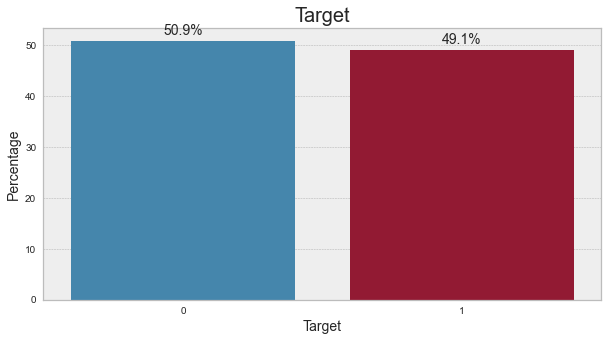

In [19]:
norm_target = (data.target.value_counts(normalize = True).mul(100).rename('percent').reset_index())
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'index', y = 'percent', data = norm_target)

for p in ax.patches: #using loop we display info about every column
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), #annotate to display info above graphs
               ha = 'center',  #centralization
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points', #the point of offset relatively to the coordinate
               fontsize = 14)
plt.title('Target', fontsize = 20)
plt.xlabel('Target', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14);

Doing normalization to display inforation in . According to the graph above the total percentage of males and females approximately equal.

In [20]:
costs = data.groupby('code')['sum'].median()
costs

code
742      -5772.00
1711   -125052.59
1799   -186832.12
3000   -208488.36
3351    -56332.06
          ...    
8999     -4300.93
9222    -22908.34
9311    -11229.58
9399    -12273.93
9402    -71397.66
Name: sum, Length: 173, dtype: float64

In [21]:
data.loc[data['code'] == 742]

client_id      datetime  code  type       sum  target
17016     815836  307 09:05:59   742  1110  -3368.87       1
18291   79610861  240 00:00:00   742  1110 -24400.30       0
30337   76380054   71 00:00:00   742  1110  -5772.00       0

In [22]:
a = costs.to_frame()

In [23]:
a.reset_index(level=0, inplace=True)
a

code        sum
0     742   -5772.00
1    1711 -125052.59
2    1799 -186832.12
3    3000 -208488.36
4    3351  -56332.06
..    ...        ...
168  8999   -4300.93
169  9222  -22908.34
170  9311  -11229.58
171  9399  -12273.93
172  9402  -71397.66

[173 rows x 2 columns]

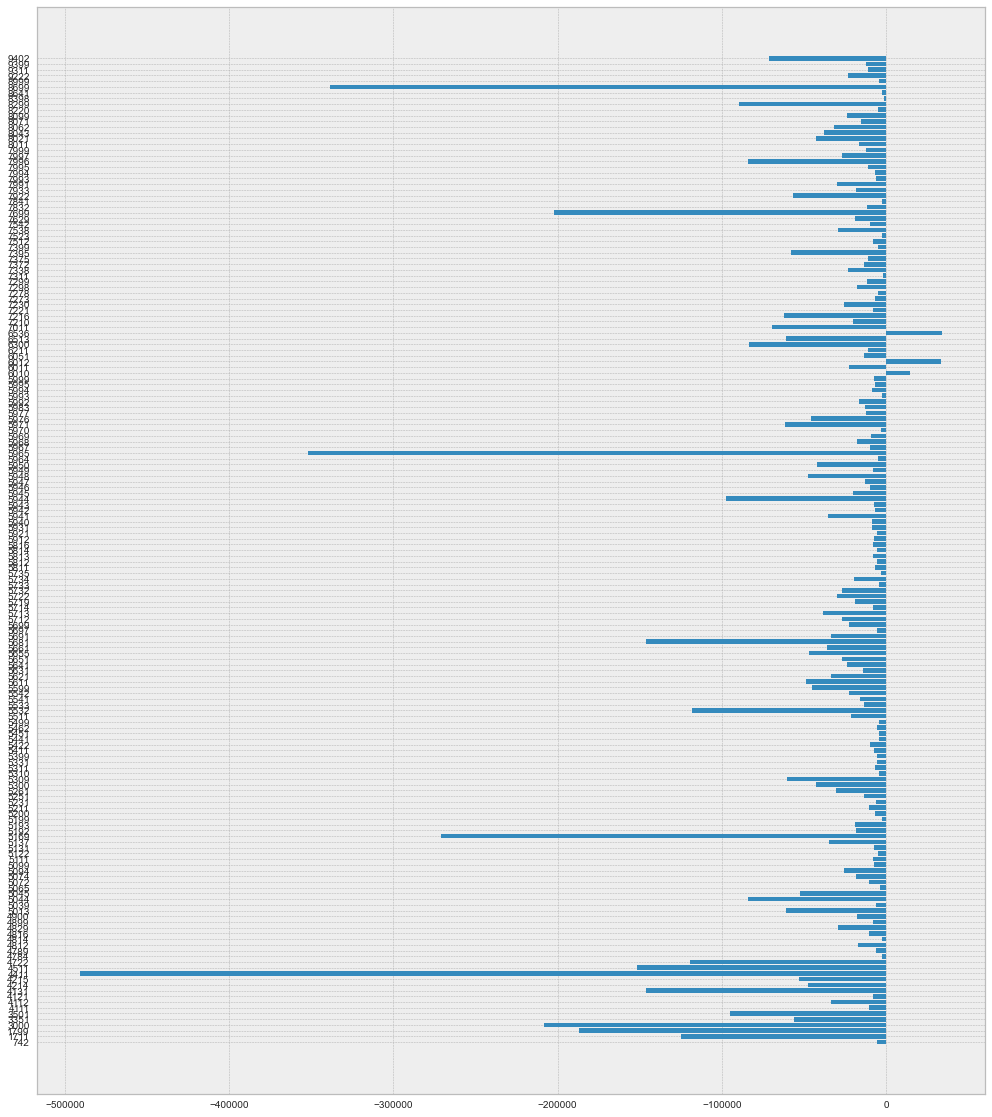

In [24]:
plt.figure(figsize = (17,20))
height = a['sum']
bars = a['code']
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.show()

In [25]:
b=a['sum'].min()
a[a['sum']==b]

code        sum
12  4411 -490851.07

According to the gpaph above we grouped all the expenses according to the code and found the place where clients spent lots of money.

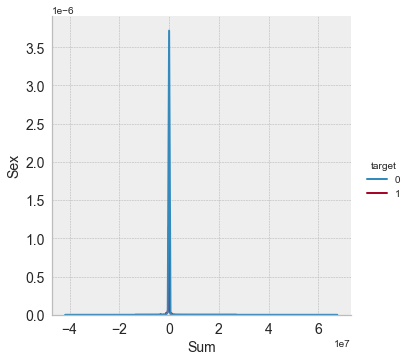

In [26]:
sns.displot(data, x = 'sum', hue = 'target', kind = 'kde', common_norm = False)
plt.xlabel('Sum', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

This is analysis of expenses relatively to the sex of the client. However the difference is unvisible, since the scatter of data is to high. This sign is not normally distributed, it is not symmetrical. It is hard to asses, that is why we will:

In [27]:
data.groupby('target')['sum'].mean()

target
0   -10785.741683
1   -22775.360583
Name: sum, dtype: float64

In [28]:
data.groupby('target')['sum'].median()

target
0   -4732.14
1   -5682.17
Name: sum, dtype: float64

And since our mean and median results are not equal, we proved that our data is not normally distributed. And males spend more money according to the mean values.

In [29]:
data['type'] = data['type'].apply(str) #convert to string to correctly visualize on graphs
data['code'] = data['code'].apply(str)

In [30]:
type_freq=data['type'].value_counts()
code_freq=data['code'].value_counts()

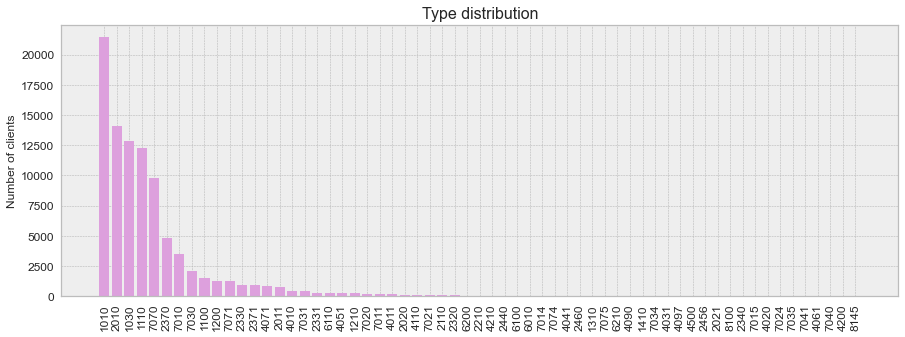

In [31]:
plt.subplots(figsize=(15,5))

plt.bar(type_freq.index,type_freq,color='plum') #bar chart for visualization
plt.title('Type distribution',size=16)
plt.ylabel("Number of clients",size=12)
plt.xticks(size = 12,rotation=90) #rotation to make xticks vertical
plt.yticks(size = 12)
plt.show()

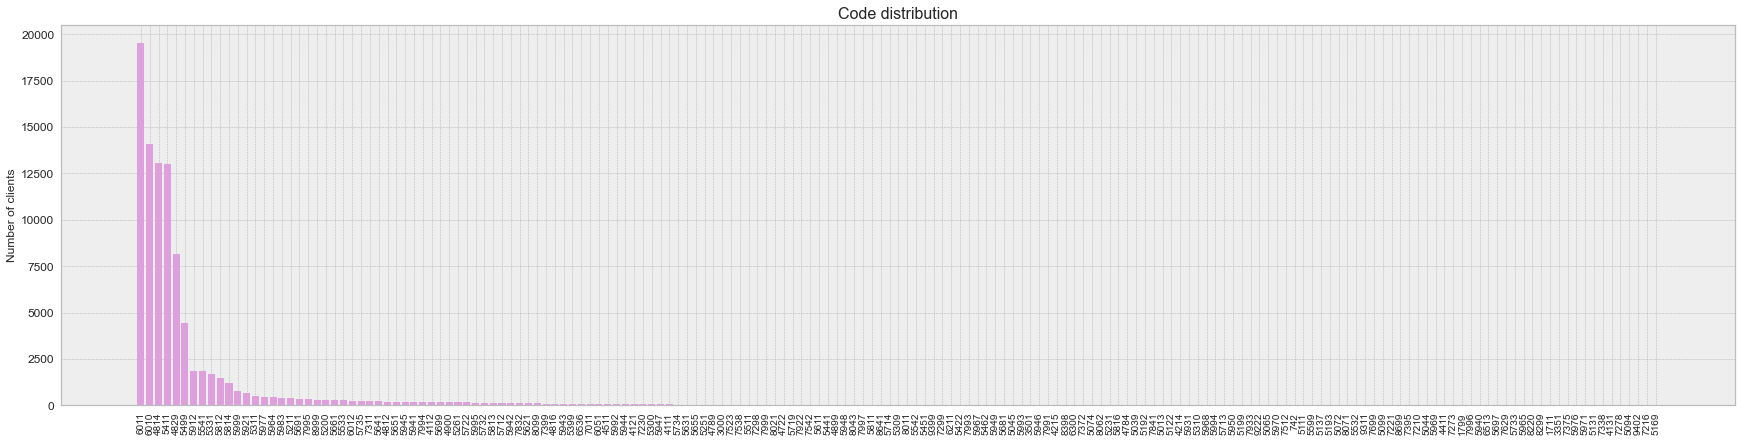

In [32]:
plt.subplots(figsize=(30,7))

plt.bar(code_freq.index,code_freq,color='plum') #bar chart for visualization
plt.title('Code distribution',size=16)
plt.ylabel("Number of clients",size=12)
plt.xticks(size = 10,rotation=90) #rotation to make xticks vertical
plt.yticks(size = 12)
plt.show()

In [33]:
data['type'] = data['type'].apply(int)
data['code'] = data['code'].apply(int)

# Feature engineering

In [34]:
day=[]
time=[]
t=[]
for i in range(len(data)):
    t=data['datetime'].iloc[i].split()
    day.append(t[0])
    time.append(t[1])

In [35]:
data['time']=time
data['day']=day

In [36]:
data[['hours','minute','seconds']]=data['time'].str.split(':',0,expand=True) #expand the split strings into separate columns
data.day=data.day.astype(int)
data.hours=data.hours.astype(int)
data.minute=data.minute.astype(int)
data.seconds=data.seconds.astype(int)
data['weekday']=(data.day+5)%7  #we suppose that 1 in dataframe is friday(1 aug 2014)
print(data.dtypes)
data.head()

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
target         int64
time          object
day            int32
hours          int32
minute         int32
seconds        int32
weekday        int32
dtype: object


client_id      datetime  code  type        sum  target      time  day  \
0   96372458  421 06:33:15  6011  2010 -561478.94       0  06:33:15  421   
1   96372458  270 06:16:18  6011  7010  224591.58       0  06:16:18  270   
2   96372458   97 10:48:35  4829  2370  -11229.58       0  10:48:35   97   
3   96372458  445 07:33:38  4829  2330 -417695.42       0  07:33:38  445   
4   96372458    4 09:33:46  4814  1030   -2245.92       0  09:33:46    4   

   hours  minute  seconds  weekday  
0      6      33       15        6  
1      6      16       18        2  
2     10      48       35        4  
3      7      33       38        2  
4      9      33       46        2

In [37]:
data=data.drop(columns=['datetime','time','minute','seconds'])  #drop unnecessary columns

In [38]:
data.head()

client_id  code  type        sum  target  day  hours  weekday
0   96372458  6011  2010 -561478.94       0  421      6        6
1   96372458  6011  7010  224591.58       0  270      6        2
2   96372458  4829  2370  -11229.58       0   97     10        4
3   96372458  4829  2330 -417695.42       0  445      7        2
4   96372458  4814  1030   -2245.92       0    4      9        2

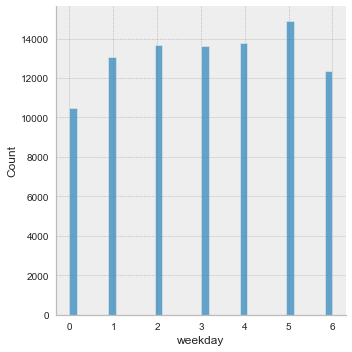

In [39]:
#The count of week days
sns.displot(data["weekday"])

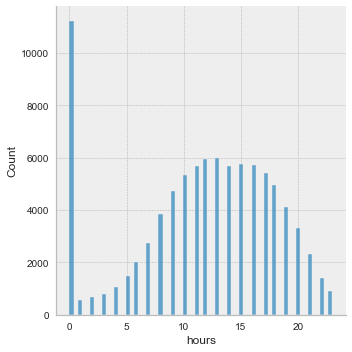

In [40]:
#The count by hours
sns.displot(data["hours"])

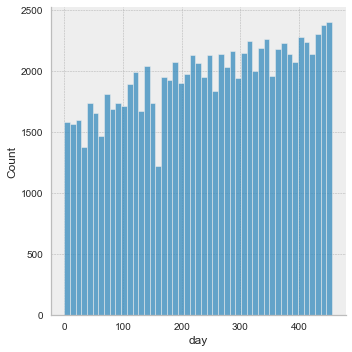

In [41]:
#Count of days
sns.displot(data["day"])

In [42]:
#separate hours 
data.loc[(data['hours']>=0) & (data['hours']<6), 'night_tr'] = 1
data.loc[(data['hours']>=6) & (data['hours']<12), 'morning_tr'] = 1
data.loc[(data['hours']>=12) & (data['hours']<18), 'afternoon_tr'] = 1
data.loc[(data['hours']>=18) & (data['hours']<=23), 'evening_tr'] = 1

data.fillna('0',inplace=True)

In [43]:
data.head()

client_id  code  type        sum  target  day  hours  weekday night_tr  \
0   96372458  6011  2010 -561478.94       0  421      6        6        0   
1   96372458  6011  7010  224591.58       0  270      6        2        0   
2   96372458  4829  2370  -11229.58       0   97     10        4        0   
3   96372458  4829  2330 -417695.42       0  445      7        2        0   
4   96372458  4814  1030   -2245.92       0    4      9        2        0   

  morning_tr afternoon_tr evening_tr  
0          1            0          0  
1          1            0          0  
2          1            0          0  
3          1            0          0  
4          1            0          0

In [44]:
#create dataframes that contains number of transactions made by customer in certain day time
night=data.groupby('client_id')['night_tr'].value_counts().reset_index(name='night_count')
morning=data.groupby('client_id')['morning_tr'].value_counts().reset_index(name='morning_count')
afternoon=data.groupby('client_id')['afternoon_tr'].value_counts().reset_index(name='afternoon_count')
evening=data.groupby('client_id')['evening_tr'].value_counts().reset_index(name='evening_count')

night=night[night['night_tr']==1]
morning=morning[morning['morning_tr']==1]
afternoon=afternoon[afternoon['afternoon_tr']==1]
evening=evening[evening['evening_tr']==1]

In [45]:
#create dataframe with only unique client ids and number of their transactions
df = data.client_id.value_counts().rename_axis('client_id').reset_index(name='transactions')

In [46]:
#df.drop(df[df.client_id == 70780820].index, inplace=True)

In [47]:
df


client_id  transactions
0      70780820          2777
1      87252636           497
2      76043922           463
3      29041434           442
4      53854864           380
...         ...           ...
5995    7361878             1
5996   40240853             1
5997   89757351             1
5998   98434538             1
5999   60550296             1

[6000 rows x 2 columns]

In [48]:
#merging df with time of day dataframes by client id
df = pd.merge(df, night, on='client_id', how='outer')
df = pd.merge(df, morning, on='client_id', how='outer')
df = pd.merge(df, afternoon, on='client_id', how='outer')
df = pd.merge(df, evening, on='client_id', how='outer')

df.fillna(0,inplace=True) #fill none with 0
df=df.drop(columns=['night_tr','morning_tr','afternoon_tr','evening_tr']) #drop unnecessary columns

In [49]:
df=pd.merge(df,train,on='client_id')

In [50]:
df

client_id  transactions  night_count  morning_count  afternoon_count  \
0      70780820          2777        734.0          881.0           1109.0   
1      87252636           497         33.0          158.0            190.0   
2      76043922           463         56.0          177.0            166.0   
3      29041434           442        107.0          158.0            164.0   
4      53854864           380         31.0          106.0            146.0   
...         ...           ...          ...            ...              ...   
5995    7361878             1          0.0            0.0              0.0   
5996   40240853             1          0.0            1.0              0.0   
5997   89757351             1          0.0            0.0              0.0   
5998   98434538             1          0.0            1.0              0.0   
5999   60550296             1          0.0            0.0              1.0   

      evening_count  target  
0              53.0       1  
1             116.0       1  
2              64.0       0  
3              13.0       1  
4              97.0       0  
...             ...     ...  
5995            1.0       1  
5996            0.0       0  
5997            1.0       1  
5998            0.0       0  
5999            0.0       0  

[6000 rows x 7 columns]

In [51]:
df

client_id  transactions  night_count  morning_count  afternoon_count  \
0      70780820          2777        734.0          881.0           1109.0   
1      87252636           497         33.0          158.0            190.0   
2      76043922           463         56.0          177.0            166.0   
3      29041434           442        107.0          158.0            164.0   
4      53854864           380         31.0          106.0            146.0   
...         ...           ...          ...            ...              ...   
5995    7361878             1          0.0            0.0              0.0   
5996   40240853             1          0.0            1.0              0.0   
5997   89757351             1          0.0            0.0              0.0   
5998   98434538             1          0.0            1.0              0.0   
5999   60550296             1          0.0            0.0              1.0   

      evening_count  target  
0              53.0       1  
1             116.0       1  
2              64.0       0  
3              13.0       1  
4              97.0       0  
...             ...     ...  
5995            1.0       1  
5996            0.0       0  
5997            1.0       1  
5998            0.0       0  
5999            0.0       0  

[6000 rows x 7 columns]

# Client's balance condition

In [52]:
benefit=data.groupby('client_id')['sum'].sum().reset_index(name='in_benefit') 
benefit

client_id  in_benefit
0         22899    50847.54
1         27914    74115.21
2         28753 -2589800.29
3         38084   693495.66
4         49793 -1382413.97
...         ...         ...
5995   99900908   -72052.13
5996   99911226  -667589.93
5997   99967537  -336887.37
5998   99985917  -224591.58
5999   99991245   569609.16

[6000 rows x 2 columns]

In [53]:
benefit.loc[(benefit['in_benefit']>0), 'is_ben'] = 1 
 
benefit.fillna('0',inplace=True)

In [54]:
benefit=benefit.drop(['in_benefit'], axis=1)

In [55]:
df=pd.merge(df,benefit, on='client_id')

## RFM

Recency

In [56]:
last_tr_df=data.groupby('client_id')['day'].max().reset_index(name='last_tr')
ones = []
for one in range(len(last_tr_df)):
    ones.append(457)
last_tr_df['today'] = ones


In [57]:
last_tr_df['Recency'] = last_tr_df['today'].sub(last_tr_df['last_tr'], axis = 0)
last_tr_df

client_id  last_tr  today  Recency
0         22899      441    457       16
1         27914      292    457      165
2         28753      433    457       24
3         38084      429    457       28
4         49793      439    457       18
...         ...      ...    ...      ...
5995   99900908      311    457      146
5996   99911226      455    457        2
5997   99967537      332    457      125
5998   99985917       61    457      396
5999   99991245      375    457       82

[6000 rows x 4 columns]

In [58]:
last_tr_df.drop(['last_tr', 'today'], axis='columns', inplace=True)
recency_df=last_tr_df
recency_df

client_id  Recency
0         22899       16
1         27914      165
2         28753       24
3         38084       28
4         49793       18
...         ...      ...
5995   99900908      146
5996   99911226        2
5997   99967537      125
5998   99985917      396
5999   99991245       82

[6000 rows x 2 columns]

## Frequency

In [59]:
frequency_df=data.groupby('client_id')['client_id'].count().reset_index(name='Frequency')
frequency_df

client_id  Frequency
0         22899          9
1         27914          4
2         28753         13
3         38084         26
4         49793         21
...         ...        ...
5995   99900908          5
5996   99911226         12
5997   99967537          1
5998   99985917          1
5999   99991245          4

[6000 rows x 2 columns]

## Monetary

In [60]:
income=data[data['sum'] <= 0]

income['sum']=income['sum'].apply(abs)
income

client_id  code  type        sum  target  day  hours  weekday night_tr  \
0       96372458  6011  2010  561478.94       0  421      6        6        0   
2       96372458  4829  2370   11229.58       0   97     10        4        0   
3       96372458  4829  2330  417695.42       0  445      7        2        0   
4       96372458  4814  1030    2245.92       0    4      9        2        0   
5       96372458  4814  1030    1122.96       0  316     23        6        0   
...          ...   ...   ...        ...     ...  ...    ...      ...      ...   
91820    4415650  6011  2010   76361.14       1  453     15        3        0   
91821   82133712  6011  2010   17967.33       1  424     13        2        0   
91823   12289409  6011  2010  132509.03       0  108     11        1        0   
91824   71829751  6011  2010   44918.32       0   72     14        0        0   
91825   91616522  6011  2010   22459.16       1  451     10        1        0   

      morning_tr afternoon_tr evening_tr  
0              1            0          0  
2              1            0          0  
3              1            0          0  
4              1            0          0  
5              0            0          1  
...          ...          ...        ...  
91820          0            1          0  
91821          0            1          0  
91823          1            0          0  
91824          0            1          0  
91825          1            0          0  

[73718 rows x 12 columns]

In [61]:
monetary_df=income.groupby('client_id')['sum'].sum().reset_index(name='Monetary')
monetary_df

client_id    Monetary
0         22899    34497.27
1         27914     4491.84
2         28753  3263575.02
3         38084  1058318.65
4         49793  1409364.96
...         ...         ...
5951   99900908    72052.13
5952   99911226   667589.93
5953   99967537   336887.37
5954   99985917   224591.58
5955   99991245    83952.33

[5956 rows x 2 columns]

## Segmentation based on RFM

In [62]:
rf_df=recency_df


In [63]:
rfm_df=recency_df

In [64]:
rfm_df=pd.merge(rfm_df,frequency_df, on='client_id')
rfm_df = pd.merge(rfm_df,monetary_df, on='client_id')

In [65]:
rfm_df

client_id  Recency  Frequency    Monetary
0         22899       16          9    34497.27
1         27914      165          4     4491.84
2         28753       24         13  3263575.02
3         38084       28         26  1058318.65
4         49793       18         21  1409364.96
...         ...      ...        ...         ...
5951   99900908      146          5    72052.13
5952   99911226        2         12   667589.93
5953   99967537      125          1   336887.37
5954   99985917      396          1   224591.58
5955   99991245       82          4    83952.33

[5956 rows x 4 columns]

In [66]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df

client_id  Recency  Frequency    Monetary  R_rank_norm  F_rank_norm  \
0         22899       16          9    34497.27    64.566795    42.536938   
1         27914      165          4     4491.84     8.237303    17.973472   
2         28753       24         13  3263575.02    53.196756    58.344527   
3         38084       28         26  1058318.65    48.809219    86.736064   
4         49793       18         21  1409364.96    61.254802    79.264607   
...         ...      ...        ...         ...          ...          ...   
5951   99900908      146          5    72052.13     9.816475    23.270651   
5952   99911226        2         12   667589.93    96.423389    54.894224   
5953   99967537      125          1   336887.37    12.112676     2.400940   
5954   99985917      396          1   224591.58     0.580452     2.400940   
5955   99991245       82          4    83952.33    20.324370    17.973472   

      M_rank_norm  
0       42.536938  
1       17.973472  
2       58.344527  
3       86.736064  
4       79.264607  
...           ...  
5951    23.270651  
5952    54.894224  
5953     2.400940  
5954     2.400940  
5955    17.973472  

[5956 rows x 7 columns]

In [67]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['client_id', 'RFM_Score']]

client_id  RFM_Score
0         22899       2.29
1         27914       0.83
2         28753       2.88
3         38084       4.05
4         49793       3.83
...         ...        ...
5951   99900908       1.06
5952   99911226       3.06
5953   99967537       0.19
5954   99985917       0.11
5955   99991245       0.92

[5956 rows x 2 columns]

In [68]:
rfm_new=rfm_df.drop(['R_rank_norm', 'F_rank_norm', 'M_rank_norm'], axis=1)
rfm_new

client_id  Recency  Frequency    Monetary  RFM_Score
0         22899       16          9    34497.27       2.29
1         27914      165          4     4491.84       0.83
2         28753       24         13  3263575.02       2.88
3         38084       28         26  1058318.65       4.05
4         49793       18         21  1409364.96       3.83
...         ...      ...        ...         ...        ...
5951   99900908      146          5    72052.13       1.06
5952   99911226        2         12   667589.93       3.06
5953   99967537      125          1   336887.37       0.19
5954   99985917      396          1   224591.58       0.11
5955   99991245       82          4    83952.33       0.92

[5956 rows x 5 columns]

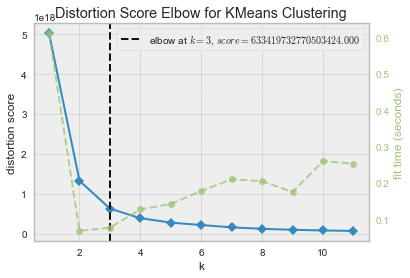

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(rfm_new)  
visualizer.show()  

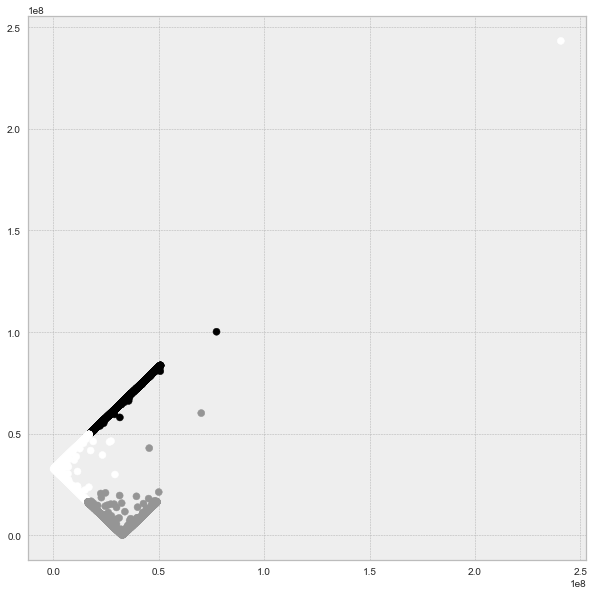

In [70]:
n_clusters = 3
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60",'#000000']
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(rfm_new)
cluster = kmeans.predict(rfm_new)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=cluster)


In [71]:
cluster

array([2, 2, 2, ..., 1, 1, 1])

<AxesSubplot:>

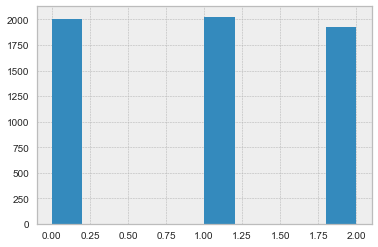

In [72]:
pd.Series(cluster).hist(bins=10)

In [73]:
df2 = pd.get_dummies(cluster, prefix="Cluster_RFM")

In [74]:
rfm_new=rfm_new.join(df2)

In [75]:
rfm_new
#=rfm_new.drop(['Recency','transactions'], axis=1)

client_id  Recency  Frequency    Monetary  RFM_Score  Cluster_RFM_0  \
0         22899       16          9    34497.27       2.29              0   
1         27914      165          4     4491.84       0.83              0   
2         28753       24         13  3263575.02       2.88              0   
3         38084       28         26  1058318.65       4.05              0   
4         49793       18         21  1409364.96       3.83              0   
...         ...      ...        ...         ...        ...            ...   
5951   99900908      146          5    72052.13       1.06              0   
5952   99911226        2         12   667589.93       3.06              0   
5953   99967537      125          1   336887.37       0.19              0   
5954   99985917      396          1   224591.58       0.11              0   
5955   99991245       82          4    83952.33       0.92              0   

      Cluster_RFM_1  Cluster_RFM_2  
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              1  
...             ...            ...  
5951              1              0  
5952              1              0  
5953              1              0  
5954              1              0  
5955              1              0  

[5956 rows x 8 columns]

In [76]:
df

client_id  transactions  night_count  morning_count  afternoon_count  \
0      70780820          2777        734.0          881.0           1109.0   
1      87252636           497         33.0          158.0            190.0   
2      76043922           463         56.0          177.0            166.0   
3      29041434           442        107.0          158.0            164.0   
4      53854864           380         31.0          106.0            146.0   
...         ...           ...          ...            ...              ...   
5995    7361878             1          0.0            0.0              0.0   
5996   40240853             1          0.0            1.0              0.0   
5997   89757351             1          0.0            0.0              0.0   
5998   98434538             1          0.0            1.0              0.0   
5999   60550296             1          0.0            0.0              1.0   

      evening_count  target is_ben  
0              53.0       1      0  
1             116.0       1      1  
2              64.0       0      0  
3              13.0       1      1  
4              97.0       0      1  
...             ...     ...    ...  
5995            1.0       1      0  
5996            0.0       0      1  
5997            1.0       1      0  
5998            0.0       0      0  
5999            0.0       0      0  

[6000 rows x 8 columns]

# Clustering for codes

In [77]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ademi\anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
codes=pd.read_csv("codes.csv",delimiter=";")

In [79]:
our_stop_words=['нигде','классифицированные','более','классифицируемые','классифицированное', 'ранее',' общий','другие','недлительного','непередаваемые','включая']

In [80]:
#Loading Stopwords into a list
NLTK_stop_words=stopwords.words('russian')

In [81]:
#All stop words
final_stopword_list = our_stop_words + NLTK_stop_words

In [82]:
list(codes[codes.code_description.str.contains('классиф')].code_description)

['Товары недлительного пользования, не классифицированные ранее',
 'Прямой маркетинг — другие торговые точки прямого маркетинга (нигде более не классифицированные)',
 'Услуги по транспортировке — нигде более не классифицированные',
 'Промышленное оборудование — нигде более не классифицированное',
 'Организации, членства, нигде ранее не классифицируемые',
 'Доктора, нигде ранее не классифицируемые',
 'Авиалинии, авиакомпании, нигде более не классифицированные',
 'Товары длительного пользования — нигде более не классифицированные',
 'Подрядчики, специализированная торговля — нигде более не классифицированные',
 'Правительственные услуги, нигде ранее не классифицируемые',
 'Услуги отдыха, нигде ранее не классифицируемые',
 'Химикалии и смежные вещества, не классифицированные ранее',
 'Практикующие врачи, медицинские услуги, нигде ранее не классифицируемые',
 'Строительные материалы — нигде более не классифицированные',
 'Профессиональные услуги, нигде ранее не классифицируемые']

In [83]:
import re

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in final_stopword_list:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 0:
        return tokens
    return None

In [84]:
codes['code_description'] = codes['code_description'].apply(lemmatize)


In [85]:
codes['code_description']

0      [магазин, продажа, час, ювелирный, изделие, из...
1                           [готовый, сумочный, изделие]
2            [услуга, переделка, починка, пошив, одежда]
3                           [транзакция, азартный, игра]
4              [мужской, женский, детский, спец, одежда]
                             ...                        
179    [офисный, фотографический, фотокопировальный, ...
180    [горючий, топливо, уголь, нефть, разжидить, бе...
181                [дилер, продажа, печатный, продукция]
182              [книга, периодический, издание, газета]
183               [театральный, продюсерский, агентство]
Name: code_description, Length: 184, dtype: object

In [86]:
from collections import defaultdict

word_freq = defaultdict(int)
for tokens in codes['code_description'].iloc[:]:
    for token in tokens:
        word_freq[token] += 1

In [87]:
word_freq=dict(word_freq)

In [88]:
dict(sorted(word_freq.items(), key=lambda item: item[1],reverse=True)[:40])

{'магазин': 27,
 'продажа': 20,
 'услуга': 16,
 'товар': 12,
 'оборудование': 12,
 'одежда': 11,
 'изделие': 8,
 'прямой': 6,
 'маркетинг': 6,
 'принадлежность': 6,
 'агентство': 5,
 'сервис': 5,
 'клуб': 5,
 'материал': 4,
 'финансовый': 4,
 'институт': 4,
 'розница': 4,
 'бытовой': 4,
 'ремонт': 4,
 'различный': 4,
 'аксессуар': 4,
 'мужской': 3,
 'детский': 3,
 'торговля': 3,
 'обеспечение': 3,
 'денежный': 3,
 'перевод': 3,
 'дорожный': 3,
 'общий': 3,
 'торговый': 3,
 'отдых': 3,
 'офисный': 3,
 'компьютерный': 3,
 'медицинский': 3,
 'подрядчик': 3,
 'ювелирный': 2,
 'игра': 2,
 'женский': 2,
 'спец': 2,
 'каталог': 2}

In [89]:
for i in range(len(codes)):
    codes['code_description'].iloc[i]=' '.join(map(str,codes['code_description'].iloc[i])) 
codes  
    

code                                   code_description
0    5944  магазин продажа час ювелирный изделие изделие ...
1    5621                           готовый сумочный изделие
2    5697              услуга переделка починка пошив одежда
3    7995                           транзакция азартный игра
4    5137                мужской женский детский спец одежда
..    ...                                                ...
179  5044  офисный фотографический фотокопировальный микр...
180  5983  горючий топливо уголь нефть разжидить бензин д...
181  5994                   дилер продажа печатный продукция
182  5192                 книга периодический издание газета
183  7922                 театральный продюсерский агентство

[184 rows x 2 columns]

In [90]:
X = codes['code_description'].unique()

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="russian", analyzer=lemmatize, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (182, 420) of float64


In [91]:
TF_IDF_matrix

<182x420 sparse matrix of type '<class 'numpy.float64'>'
	with 641 stored elements in Compressed Sparse Row format>

In [92]:
svd = TruncatedSVD(n_components = 156)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (182, 156) of float64


In [93]:
var_explained = svd.explained_variance_ratio_.sum()
var_explained


0.9517177154880285

In [94]:
score_tfidf = []

x = list(range(2, 25, 1))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)
    print("N clusters =", n_clusters, "Silhouette Score :", silhouette_avg)
    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

    

N clusters = 2 Silhouette Score : 0.010963558429994394
N clusters = 3 Silhouette Score : 0.01457596291769751
N clusters = 4 Silhouette Score : 0.02192720914841893
N clusters = 5 Silhouette Score : 0.02605955853145312
N clusters = 6 Silhouette Score : 0.02893975360728092
N clusters = 7 Silhouette Score : 0.029949222300456945
N clusters = 8 Silhouette Score : 0.03387121337130222
N clusters = 9 Silhouette Score : 0.038441363319004725
N clusters = 10 Silhouette Score : 0.04212780341925186
N clusters = 11 Silhouette Score : 0.038198321235446336
N clusters = 12 Silhouette Score : 0.037798966425118555
N clusters = 13 Silhouette Score : 0.04385462234411141
N clusters = 14 Silhouette Score : 0.04367468756503081
N clusters = 15 Silhouette Score : 0.040351996226281175
N clusters = 16 Silhouette Score : 0.04844995480280053
N clusters = 17 Silhouette Score : 0.06084165200533859
N clusters = 18 Silhouette Score : 0.05486323654239142
N clusters = 19 Silhouette Score : 0.05825769432601803
N clusters =

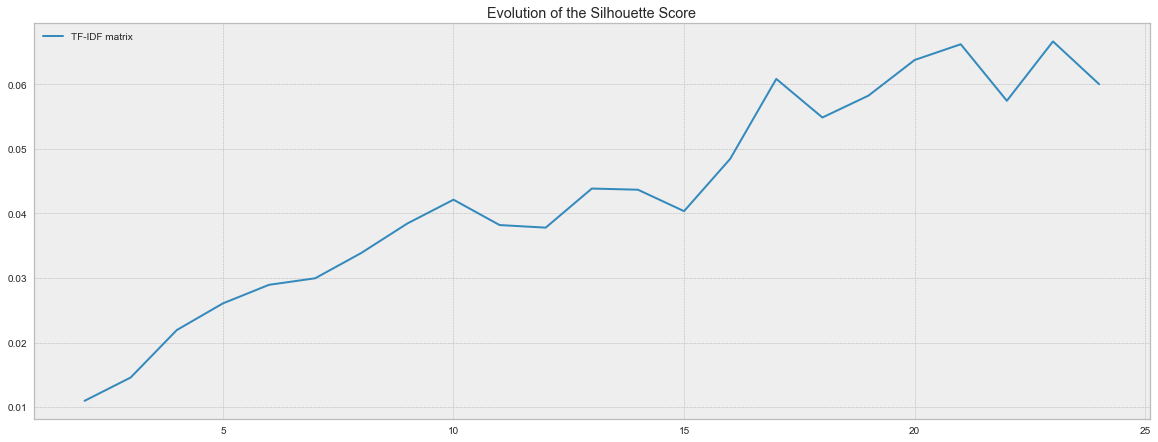

In [95]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

In [96]:
codes

code                                   code_description
0    5944  магазин продажа час ювелирный изделие изделие ...
1    5621                           готовый сумочный изделие
2    5697              услуга переделка починка пошив одежда
3    7995                           транзакция азартный игра
4    5137                мужской женский детский спец одежда
..    ...                                                ...
179  5044  офисный фотографический фотокопировальный микр...
180  5983  горючий топливо уголь нефть разжидить бензин д...
181  5994                   дилер продажа печатный продукция
182  5192                 книга периодический издание газета
183  7922                 театральный продюсерский агентство

[184 rows x 2 columns]

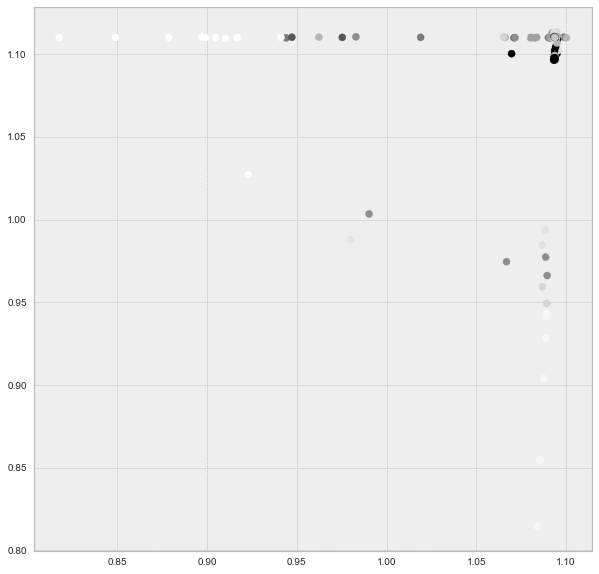

In [97]:
n_clusters = 16

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)


Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

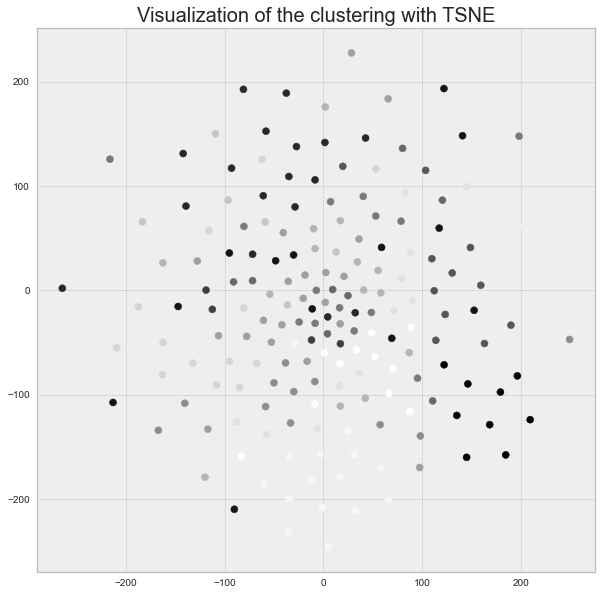

In [98]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

<Figure size 432x288 with 0 Axes>

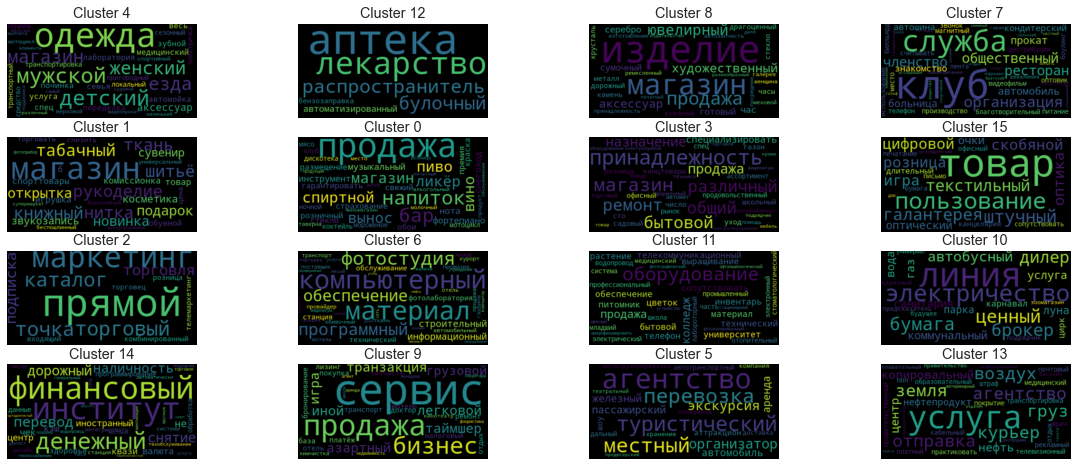

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(16), 16)) :
    plt.subplot(4,4 , num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

In [100]:
clusters

array([ 8,  8,  4,  9,  4,  2,  9,  1, 15, 11,  0, 14, 11,  7,  1, 13, 12,
        1,  6,  0, 15,  3,  1, 11,  7,  7,  8,  9,  0, 14,  3,  7,  2,  9,
        0, 13, 14,  9,  7,  8,  6,  7, 10,  7,  4, 11,  2, 12,  1, 15, 14,
        9, 12, 13,  6,  3,  7, 13, 10,  3, 11,  7,  5,  6, 13,  4,  9,  8,
       13, 14,  7,  9,  1, 11,  7,  5,  9,  7,  3,  2, 10,  8,  6,  8, 14,
        9,  7, 15,  3, 10,  3,  4,  1, 15,  7, 11,  5,  0, 14,  6, 11,  7,
       15, 10, 15,  9,  3,  9, 13, 13,  7, 10,  4,  8,  6,  8,  7,  0,  2,
        1,  7, 14, 13,  7,  0,  4,  1,  4, 13,  5, 13, 10,  3,  4,  4,  9,
       10,  6, 14,  0,  3,  1,  7,  4, 14,  6,  0,  1, 13,  4, 14,  1,  8,
       11, 15, 12,  1,  0,  3,  6,  6, 13, 14,  5,  9,  1, 13, 13,  1, 15,
        6, 14, 11,  6,  4, 13,  8, 11,  6,  0, 13,  5])

<AxesSubplot:>

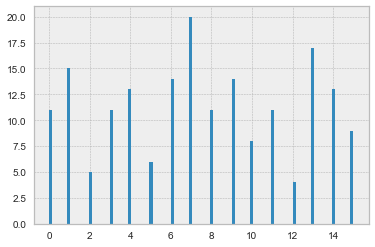

In [101]:
pd.Series(clusters).hist(bins=100)

In [102]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [103]:
cluster = codes['code_description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster_codes")

In [104]:
cluster

0       8
1       8
2       4
3       9
4       4
       ..
179    11
180     6
181     0
182    13
183     5
Name: code_description, Length: 184, dtype: int64

In [105]:
codes=codes.join(df2)

In [106]:
codes.head()

code                                   code_description  Cluster_codes_0  \
0  5944  магазин продажа час ювелирный изделие изделие ...                0   
1  5621                           готовый сумочный изделие                0   
2  5697              услуга переделка починка пошив одежда                0   
3  7995                           транзакция азартный игра                0   
4  5137                мужской женский детский спец одежда                0   

   Cluster_codes_1  Cluster_codes_2  Cluster_codes_3  Cluster_codes_4  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                1   
3                0                0                0                0   
4                0                0                0                1   

   Cluster_codes_5  Cluster_codes_6  Cluster_codes_7  Cluster_codes_8  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Cluster_codes_9  Cluster_codes_10  Cluster_codes_11  Cluster_codes_12  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   
3                1                 0                 0                 0   
4                0                 0                 0                 0   

   Cluster_codes_13  Cluster_codes_14  Cluster_codes_15  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0  
3                 0                 0                 0  
4                 0                 0                 0

In [107]:
data=pd.merge(data,codes,on='code')

In [108]:
data

client_id  code  type        sum  target  day  hours  weekday night_tr  \
0       96372458  6011  2010 -561478.94       0  421      6        6        0   
1       96372458  6011  7010  224591.58       0  270      6        2        0   
2       96372458  6011  2010 -426724.00       0   68      2        3        1   
3       96372458  6011  2010 -112295.79       0  433      6        4        0   
4       21717441  6011  2010  -44918.32       0   55     13        4        0   
...          ...   ...   ...        ...     ...  ...    ...      ...      ...   
91802   75555017  1711  1110 -125052.59       1  421      0        6        1   
91803   31009144  4411  1210 -904166.84       0   81     17        2        0   
91804   63953233  4411  1210  -77535.30       0   15      0        6        1   
91805     516081  5697  1110   -5614.79       0  442      0        6        1   
91806   61978280  5169  1200 -271194.78       1  401      0        0        1   

      morning_tr  ... Cluster_codes_6 Cluster_codes_7 Cluster_codes_8  \
0              1  ...               0               0               0   
1              1  ...               0               0               0   
2              0  ...               0               0               0   
3              1  ...               0               0               0   
4              0  ...               0               0               0   
...          ...  ...             ...             ...             ...   
91802          0  ...               0               0               0   
91803          0  ...               0               0               0   
91804          0  ...               0               0               0   
91805          0  ...               0               0               0   
91806          0  ...               0               1               0   

       Cluster_codes_9  Cluster_codes_10  Cluster_codes_11  Cluster_codes_12  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
91802                0                 0                 0                 0   
91803                0                 1                 0                 0   
91804                0                 1                 0                 0   
91805                0                 0                 0                 0   
91806                0                 0                 0                 0   

       Cluster_codes_13  Cluster_codes_14  Cluster_codes_15  
0                     0                 1                 0  
1                     0                 1                 0  
2                     0                 1                 0  
3                     0                 1                 0  
4                     0                 1                 0  
...                 ...               ...               ...  
91802                 0                 1                 0  
91803                 0                 0                 0  
91804                 0                 0                 0  
91805                 0                 0                 0  
91806                 0                 0                 0  

[91807 rows x 29 columns]

In [109]:
df

client_id  transactions  night_count  morning_count  afternoon_count  \
0      70780820          2777        734.0          881.0           1109.0   
1      87252636           497         33.0          158.0            190.0   
2      76043922           463         56.0          177.0            166.0   
3      29041434           442        107.0          158.0            164.0   
4      53854864           380         31.0          106.0            146.0   
...         ...           ...          ...            ...              ...   
5995    7361878             1          0.0            0.0              0.0   
5996   40240853             1          0.0            1.0              0.0   
5997   89757351             1          0.0            0.0              0.0   
5998   98434538             1          0.0            1.0              0.0   
5999   60550296             1          0.0            0.0              1.0   

      evening_count  target is_ben  
0              53.0       1      0  
1             116.0       1      1  
2              64.0       0      0  
3              13.0       1      1  
4              97.0       0      1  
...             ...     ...    ...  
5995            1.0       1      0  
5996            0.0       0      1  
5997            1.0       1      0  
5998            0.0       0      0  
5999            0.0       0      0  

[6000 rows x 8 columns]

In [110]:
df = pd.merge(df,rfm_new, on='client_id')


In [111]:
for t in range(16):
    df=pd.merge(df,data.groupby("client_id")['Cluster_codes_'+str(t)].sum(),on='client_id')

In [112]:
df

client_id  transactions  night_count  morning_count  afternoon_count  \
0      70780820          2777        734.0          881.0           1109.0   
1      87252636           497         33.0          158.0            190.0   
2      76043922           463         56.0          177.0            166.0   
3      29041434           442        107.0          158.0            164.0   
4      53854864           380         31.0          106.0            146.0   
...         ...           ...          ...            ...              ...   
5951   39357161             1          0.0            1.0              0.0   
5952    7361878             1          0.0            0.0              0.0   
5953   89757351             1          0.0            0.0              0.0   
5954   98434538             1          0.0            1.0              0.0   
5955   60550296             1          0.0            0.0              1.0   

      evening_count  target is_ben  Recency  Frequency  ...  Cluster_codes_6  \
0              53.0       1      0        1       2777  ...                0   
1             116.0       1      1        6        497  ...                0   
2              64.0       0      0        2        463  ...                0   
3              13.0       1      1        1        442  ...                0   
4              97.0       0      1        3        380  ...                0   
...             ...     ...    ...      ...        ...  ...              ...   
5951            0.0       1      0      196          1  ...                0   
5952            1.0       1      0       74          1  ...                0   
5953            1.0       1      0      208          1  ...                0   
5954            0.0       0      0      127          1  ...                0   
5955            0.0       0      0      368          1  ...                0   

      Cluster_codes_7  Cluster_codes_8  Cluster_codes_9  Cluster_codes_10  \
0                   0                0                0                 0   
1                   0                0                0                 0   
2                   2                0                0                 0   
3                   0                0                0                 0   
4                   2                0                0                 0   
...               ...              ...              ...               ...   
5951                0                0                0                 0   
5952                0                0                0                 0   
5953                0                0                0                 0   
5954                0                0                0                 0   
5955                0                0                0                 0   

      Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  \
0                    0                 0                 0            2777.0   
1                    1                 0                 0             496.0   
2                    0                 0                 0             461.0   
3                    0                 0                 0             442.0   
4                    1                 1                 2             363.0   
...                ...               ...               ...               ...   
5951                 0                 0                 0               1.0   
5952                 0                 0                 0               1.0   
5953                 0                 0                 0               1.0   
5954                 0                 0                 0               0.0   
5955                 0                 0                 0               1.0   

      Cluster_codes_15  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
5951                 0  
5952                 0

In [113]:
df=df.drop(['transactions'], axis=1)

# Clustering for types

### Data cleaning for types

In [114]:
types=pd.read_csv("types.csv",delimiter=";")

In [115]:
len(types)

155

In [116]:
len(data.type.unique())

61

In [117]:
unique_types=pd.DataFrame()
unique_types['type']=data.type.unique()

In [118]:
len(unique_types)

61

In [119]:
types_in_data=pd.merge(unique_types,types,on='type')

In [120]:
len(types_in_data)

58

In [121]:
#find types that are in data but not in types (no type description)
not_in_type=data[(~data.type.isin(types_in_data.type))]
not_in_type=not_in_type.type.unique()
print(not_in_type)

[4097 2460 2456]


In [122]:
data['type'].mode()

0    1010
dtype: int64

In [123]:
no_data_types=types_in_data[types_in_data['type_description']=='н/д']

In [124]:
no_data_types

type type_description
18  2440              н/д
23  4090              н/д
52  1310              н/д
53  1410              н/д

In [125]:
sum=0
for i in range(len(data)):
    if (data['type'].iloc[i] in not_in_type):
        sum=sum+1
print(sum) #amount of 'н/д' in data

26


In [126]:
types_in_data[types_in_data['type_description'].duplicated()==True]

type          type_description
23  4090                       н/д
29  1010             Покупка. POS 
36  7021  Взнос наличных через POS
52  1310                       н/д
53  1410                       н/д

In [127]:
#replace types that are in data but not in types with mode
#replace 'н/д' with mode
#replace types with repeated type description
for i in range(len(data)):
    if (data['type'].iloc[i] in not_in_type) or (data['type'].iloc[i] in no_data_types) or (data['type'].iloc[i]==1110):
        data['type'].iloc[i]=1010
    elif (data['type'].iloc[i]==7021):
        data['type'].iloc[i]=7020
    

In [128]:
#drop 'н/д'
types_in_data=types_in_data.drop(types_in_data[types_in_data['type_description']=='н/д'].index)

In [129]:
#drop duplicates
types_in_data=types_in_data.drop(types_in_data[types_in_data['type']==1110].index)
types_in_data=types_in_data.drop(types_in_data[types_in_data['type']==7021].index)


In [130]:
types_in_data[types_in_data['type_description'].duplicated()==True]

Empty DataFrame
Columns: [type, type_description]
Index: []

In [131]:
data.groupby('type').count().client_id.sort_values(ascending=False)

type
1010    33726
2010    14135
1030    12848
7070     9808
2370     4788
7010     3529
7030     2092
1100     1488
1200     1243
7071     1236
2330      943
2371      908
4071      887
2011      782
4010      416
7031      404
7020      328
2331      279
6110      279
4051      275
1210      237
7011      176
4011      160
2020      146
4110      123
2110      103
2320       68
6200       62
2210       41
4210       39
2440       37
6100       26
6010       25
7014       24
7074       23
4041       15
1310       15
7075       13
4090       12
6210       12
1410       11
7034        9
4031        6
4500        5
8100        4
2021        4
2340        3
7015        3
4020        3
7024        2
7040        1
7035        1
7041        1
4061        1
4200        1
8145        1
Name: client_id, dtype: int64

### Creating clusters for types

In [132]:
list(types_in_data['type_description'])

['Выдача наличных в АТМ',
 'Взнос наличных через АТМ (в своем тер.банке)',
 'Выдача наличных в АТМ банка (в других ТБ)',
 'Взнос наличных через АТМ',
 'Плата за получение наличных в АТМ банка',
 'Наличные.   АТМ',
 'Наличные.  АТМ Зарубеж. банк',
 'Плата за получение наличных в АТМ. Зарубеж.',
 'Взнос наличных через АТМ (в своем ТБ) по счету в овердрафте',
 'Плата за получение наличных в АТМ.',
 'Плата за получение наличных в АТМ банка (в других ТБ)',
 'Плата за взнос наличных через АТМ (в другом тер.банке)',
 'Зачисление до завершения претензионной работы',
 'Взнос наличных через АТМ (в других ТБ) по счету в овердрафте',
 'Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)',
 'Списание с карты по операции “перевода с карты на карту” через АТМ (в пределах одного тер.банка)',
 'Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (с комиссией)',
 'Плата за перевод на карту (с карты) через Мобильный банк

In [133]:
len(types_in_data)

52

In [134]:
clt0=[]
clt1=[]
clt2=[]
clt3=[]
clt4=[]
clusters_t=[]
for sent in types_in_data['type_description']:
    sent=sent.lower()
    if ('списание' in sent) or ('перевод' in sent):
        clt0.append(sent)
        clusters_t.append(0)
    elif ('плата' in sent) or ('платеж' in sent) or ('оплата' in sent):
        clt1.append(sent)
        clusters_t.append(1)
    elif ('возврат' in sent):
        clt2.append(sent)
        clusters_t.append(2)
    elif 'покупка' in sent:
        clt3.append(sent)
        clusters_t.append(3)
    else:
        clt4.append(sent)
        clusters_t.append(4)    

In [135]:
dict_article_to_cluster_types = {article : cluster for article, cluster in zip(types_in_data['type_description'], clusters_t)}

In [136]:
cluster_types = types_in_data['type_description'].apply(lambda x : dict_article_to_cluster_types[x])
df3 = pd.get_dummies(cluster_types, prefix="Cluster_types")

In [137]:
types_in_data=types_in_data.join(df3)

In [138]:
types_in_data

type                                   type_description  Cluster_types_0  \
0   2010                              Выдача наличных в АТМ                0   
1   7010       Взнос наличных через АТМ (в своем тер.банке)                0   
2   2011          Выдача наличных в АТМ банка (в других ТБ)                0   
3   7011                           Взнос наличных через АТМ                0   
4   4010            Плата за получение наличных в АТМ банка                0   
5   2110                                    Наличные.   АТМ                0   
6   2210                       Наличные.  АТМ Зарубеж. банк                0   
7   4210        Плата за получение наличных в АТМ. Зарубеж.                0   
8   7014  Взнос наличных через АТМ (в своем ТБ) по счету...                0   
9   4110                 Плата за получение наличных в АТМ.                0   
10  4011  Плата за получение наличных в АТМ банка (в дру...                0   
11  4031  Плата за взнос наличных через АТМ (в другом те...                0   
12  8145      Зачисление до завершения претензионной работы                0   
13  7015  Взнос наличных через АТМ (в других ТБ) по счет...                0   
14  2370  Списание с карты на карту по операции <перевод...                1   
15  2330  Списание с карты по операции “перевода с карты...                1   
16  2371  Списание с карты на карту по операции <перевод...                1   
17  4071  Плата за перевод на карту (с карты) через Моби...                1   
19  2331  Списание с карты по операции “перевода с карты...                1   
20  4051  Плата за перевод на карту (с карты) через АТМ ...                1   
21  6110                              Возврат покупки. POS                 0   
22  2340  Списание с карты по операции “перевода с карты...                1   
24  4061     Плата за перевод на карту (с карты) через POS                 1   
25  1030                           Оплата услуги. Банкоматы                0   
26  1100                                           Покупка.                0   
28  1200                                 Покупка. Зарубеж.                 0   
29  1010                                      Покупка. POS                 0   
30  7030  Перевод на карту (с карты) через АТМ (в предел...                1   
31  7070  Перевод на карту (с карты) через Мобильный бан...                1   
32  7020                           Взнос наличных через POS                0   
33  7071  Перевод на карту (с карты) через Мобильный бан...                1   
34  7031  Перевод на карту (с карты) через АТМ (из одног...                1   
35  7034  Перевод на карту/ с карты через АТМ (без взима...                1   
37  7074  Перевод с карты на карту в овердрафте через Мо...                1   
38  7075  Перевод с карты на карту в овердрафте через Мо...                1   
39  7035  Перевод на карту/ с карты через АТМ (со взиман...                1   
40  2020                    Выдача наличных через POS банка                0   
41  7024  Взнос наличных через POS (в своем ТБ) по счету...                0   
42  4041  Плата за взнос наличных через POS (в другом те...                0   
43  4500                             Плата за превыш.лимита                0   
44  7040  Перевод на карту (с карты) через POS (в предел...                1   
45  2021      Выдача наличных через POS банка (в других ТБ)                0   
46  7041  Перевод на карту (с карты) через POS (из одног...                1   
47  4200              Плата за получение наличных. Зарубеж.                0   
48  4020      Плата за получение наличных через POS в банке                0   
49  6100                                  Возврат  покупки.                0   
50  1210                             Покупка. POS  Зарубеж.                0   
51  6200                         Возврат  покупки. Зарубеж.                0   
54  6010                              Возврат  покупки. POS                0   
55  

In [139]:
data=pd.merge(data,types_in_data,on='type')

In [140]:
for t in range(5):
    df=pd.merge(df,data.groupby("client_id")['Cluster_types_'+str(t)].sum(),on='client_id')

# Outliers in Frequency and Recency

In [141]:
data

client_id  code  type        sum  target  day  hours  weekday night_tr  \
0       96372458  6011  2010 -561478.94       0  421      6        6        0   
1       96372458  6011  2010 -426724.00       0   68      2        3        1   
2       96372458  6011  2010 -112295.79       0  433      6        4        0   
3       21717441  6011  2010  -44918.32       0   55     13        4        0   
4       21717441  6011  2010 -898366.31       0  294     13        5        0   
...          ...   ...   ...        ...     ...  ...    ...      ...      ...   
91727   17576256  4900  2320   -1633.23       0  200     12        2        0   
91728   30168354  4900  2320     -57.27       0  406     14        5        0   
91729   94500594  4900  2320   -5510.58       0  279     15        4        0   
91730   94500594  4900  2320 -172184.70       0  446      9        3        0   
91731   36683330  4900  2320   -8856.77       0  162     17        6        0   

      morning_tr  ... Cluster_codes_12 Cluster_codes_13 Cluster_codes_14  \
0              1  ...                0                0                1   
1              0  ...                0                0                1   
2              1  ...                0                0                1   
3              0  ...                0                0                1   
4              0  ...                0                0                1   
...          ...  ...              ...              ...              ...   
91727          0  ...                0                0                0   
91728          0  ...                0                0                0   
91729          0  ...                0                0                0   
91730          1  ...                0                0                0   
91731          0  ...                0                0                0   

       Cluster_codes_15                                type_description  \
0                     0                           Выдача наличных в АТМ   
1                     0                           Выдача наличных в АТМ   
2                     0                           Выдача наличных в АТМ   
3                     0                           Выдача наличных в АТМ   
4                     0                           Выдача наличных в АТМ   
...                 ...                                             ...   
91727                 0  Безналичный перевод денежных средств через POS   
91728                 0  Безналичный перевод денежных средств через POS   
91729                 0  Безналичный перевод денежных средств через POS   
91730                 0  Безналичный перевод денежных средств через POS   
91731                 0  Безналичный перевод денежных средств через POS   

       Cluster_types_0  Cluster_types_1  Cluster_types_2  Cluster_types_3  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
91727                1                0                0                0   
91728                1                0                0                0   
91729                1                0                0                0   
91730                1                0                0                0   
91731                1                0                0                0   

       Cluster_types_4  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
91727                0  
91728                0  
91729                0  
91730                0  
91731               

In [142]:
data.head()

client_id  code  type        sum  target  day  hours  weekday night_tr  \
0   96372458  6011  2010 -561478.94       0  421      6        6        0   
1   96372458  6011  2010 -426724.00       0   68      2        3        1   
2   96372458  6011  2010 -112295.79       0  433      6        4        0   
3   21717441  6011  2010  -44918.32       0   55     13        4        0   
4   21717441  6011  2010 -898366.31       0  294     13        5        0   

  morning_tr  ... Cluster_codes_12 Cluster_codes_13 Cluster_codes_14  \
0          1  ...                0                0                1   
1          0  ...                0                0                1   
2          1  ...                0                0                1   
3          0  ...                0                0                1   
4          0  ...                0                0                1   

   Cluster_codes_15       type_description  Cluster_types_0  Cluster_types_1  \
0                 0  Выдача наличных в АТМ                0                0   
1                 0  Выдача наличных в АТМ                0                0   
2                 0  Выдача наличных в АТМ                0                0   
3                 0  Выдача наличных в АТМ                0                0   
4                 0  Выдача наличных в АТМ                0                0   

   Cluster_types_2  Cluster_types_3  Cluster_types_4  
0                0                0                1  
1                0                0                1  
2                0                0                1  
3                0                0                1  
4                0                0                1  

[5 rows x 35 columns]

In [143]:
df.describe()

client_id  night_count  morning_count  afternoon_count  \
count  5.956000e+03  5956.000000    5956.000000      5956.000000   
mean   5.101316e+07     2.657656       4.088986         5.795500   
std    2.881280e+07    10.556195      13.358638        16.513562   
min    2.289900e+04     0.000000       0.000000         0.000000   
25%    2.606709e+07     0.000000       1.000000         2.000000   
50%    5.164271e+07     1.000000       2.000000         4.000000   
75%    7.589229e+07     3.000000       5.000000         7.000000   
max    9.999124e+07   734.000000     881.000000      1109.000000   

       evening_count       target      Recency    Frequency      Monetary  \
count    5956.000000  5956.000000  5956.000000  5956.000000  5.956000e+03   
mean        2.862827     0.443586    54.055406    15.404970  7.565306e+05   
std         6.053039     0.496849    73.205933    41.790588  3.728438e+06   
min         0.000000     0.000000     1.000000     1.000000  2.246000e+01   
25%         0.000000     0.000000    10.000000     5.000000  9.940087e+04   
50%         1.000000     0.000000    26.000000    11.000000  2.714464e+05   
75%         4.000000     1.000000    66.000000    19.000000  6.474960e+05   
max       139.000000     1.000000   454.000000  2777.000000  2.414898e+08   

         RFM_Score  ...  Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  \
count  5956.000000  ...       5956.000000       5956.000000       5956.000000   
mean      2.506706  ...          0.086635          0.319006          0.263768   
std       1.356601  ...          0.383824          1.030671          0.816972   
min       0.100000  ...          0.000000          0.000000          0.000000   
25%       1.350000  ...          0.000000          0.000000          0.000000   
50%       2.520000  ...          0.000000          0.000000          0.000000   
75%       3.670000  ...          0.000000          0.000000          0.000000   
max       5.000000  ...         15.000000         57.000000         14.000000   

       Cluster_codes_14  Cluster_codes_15  Cluster_types_0  Cluster_types_1  \
count       5956.000000       5956.000000      5956.000000      5956.000000   
mean           7.411518          0.063801         3.646743         2.286098   
std           40.631738          0.321038        39.746478         2.757860   
min            0.000000          0.000000         0.000000         0.000000   
25%            2.000000          0.000000         0.000000         0.000000   
50%            4.000000          0.000000         1.000000         1.000000   
75%            8.000000          0.000000         3.000000         3.000000   
max         2777.000000          7.000000      2741.000000        32.000000   

       Cluster_types_2  Cluster_types_3  Cluster_types_4  
count      5956.000000      5956.000000      5956.000000  
mean          0.067663         6.160846         3.231028  
std           0.462848         7.400024         3.977985  
min           0.000000         0.000000         0.000000  
25%           0.000000         1.000000         1.000000  
50%           0.000000         4.000000         2.000000  
75%           0.000000         9.000000         4.000000  
max          16.000000       109.000000       162.000000  

[8 rows x 34 columns]

In [144]:
max_thresold = df['Frequency'].quantile(0.999)
max_thresold

336.3050000000285

In [145]:
df[df['Frequency']>max_thresold]

client_id  night_count  morning_count  afternoon_count  evening_count  \
0   70780820        734.0          881.0           1109.0           53.0   
1   87252636         33.0          158.0            190.0          116.0   
2   76043922         56.0          177.0            166.0           64.0   
3   29041434        107.0          158.0            164.0           13.0   
4   53854864         31.0          106.0            146.0           97.0   
5   29894123          8.0          107.0            130.0          119.0   

   target is_ben  Recency  Frequency     Monetary  ...  Cluster_codes_11  \
0       1      0        1       2777  41684196.72  ...                 0   
1       1      1        6        497  60767294.81  ...                 1   
2       0      0        2        463   4353088.76  ...                 0   
3       1      1        1        442   6150850.22  ...                 0   
4       0      1        3        380   3097812.56  ...                 1   
5       0      1        2        364   1080230.92  ...                 0   

   Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  Cluster_codes_15  \
0                 0                 0            2777.0                 0   
1                 0                 0             496.0                 0   
2                 0                 0             461.0                 0   
3                 0                 0             442.0                 0   
4                 1                 2             363.0                 0   
5                 0                 1             351.0                 0   

   Cluster_types_0  Cluster_types_1  Cluster_types_2  Cluster_types_3  \
0           2741.0                0                1                0   
1            464.0                0                3                1   
2            458.0                2                0                0   
3            440.0                0                0                0   
4            343.0                2               10               17   
5            334.0                3                3               11   

   Cluster_types_4  
0               35  
1               29  
2                3  
3                2  
4                8  
5               13  

[6 rows x 35 columns]

In [146]:
min_thresold = df['Frequency'].quantile(0.001)
min_thresold

1.0

In [147]:
df[df['Frequency']<min_thresold]

Empty DataFrame
Columns: [client_id, night_count, morning_count, afternoon_count, evening_count, target, is_ben, Recency, Frequency, Monetary, RFM_Score, Cluster_RFM_0, Cluster_RFM_1, Cluster_RFM_2, Cluster_codes_0, Cluster_codes_1, Cluster_codes_2, Cluster_codes_3, Cluster_codes_4, Cluster_codes_5, Cluster_codes_6, Cluster_codes_7, Cluster_codes_8, Cluster_codes_9, Cluster_codes_10, Cluster_codes_11, Cluster_codes_12, Cluster_codes_13, Cluster_codes_14, Cluster_codes_15, Cluster_types_0, Cluster_types_1, Cluster_types_2, Cluster_types_3, Cluster_types_4]
Index: []

[0 rows x 35 columns]

In [148]:
df[(df['Frequency']<max_thresold) & (df['Frequency']>min_thresold)]


client_id  night_count  morning_count  afternoon_count  evening_count  \
6      85861930          9.0          100.0            102.0          124.0   
7      38691781          8.0           83.0            121.0          117.0   
8      73534440         13.0          129.0            114.0           70.0   
9      19805868          3.0           89.0            135.0           84.0   
10     54186907         36.0          108.0             93.0           58.0   
...         ...          ...            ...              ...            ...   
5666   54669253          0.0            1.0              1.0            0.0   
5667   70444371          0.0            1.0              0.0            1.0   
5668   71493601          0.0            1.0              1.0            0.0   
5669    3156819          0.0            0.0              2.0            0.0   
5670   55906283          1.0            0.0              1.0            0.0   

      target is_ben  Recency  Frequency     Monetary  ...  Cluster_codes_11  \
6          0      0        1        335   4809415.49  ...                 0   
7          0      0        5        329   4657294.43  ...                 0   
8          0      1        2        326   3640065.55  ...                 0   
9          1      0        2        311   8525298.21  ...                 0   
10         1      0        4        295  11759925.88  ...                 0   
...      ...    ...      ...        ...          ...  ...               ...   
5666       0      0      103          2    291969.05  ...                 0   
5667       1      0        4          2    106972.97  ...                 0   
5668       0      0      218          2     50129.52  ...                 0   
5669       1      1       32          2      1885.00  ...                 0   
5670       0      0      163          2     48049.12  ...                 0   

      Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  Cluster_codes_15  \
6                    1                 0             329.0                 0   
7                    3                 0             315.0                 0   
8                    0                 1             315.0                 0   
9                    1                 1             302.0                 0   
10                   0                 0             272.0                 0   
...                ...               ...               ...               ...   
5666                 0                 0               2.0                 0   
5667                 0                 0               1.0                 0   
5668                 0                 0               0.0                 0   
5669                 0                 0               1.0                 0   
5670                 0                 0               0.0                 0   

      Cluster_types_0  Cluster_types_1  Cluster_types_2  Cluster_types_3  \
6               322.0                3                0                5   
7               304.0                1                0               14   
8               311.0                2                0                9   
9               286.0                2                3                7   
10              260.0               12                0               14   
...               ...              ...              ...              ...   
5666              0.0                0                0                0   
5667              0.0                0                0                1   
5668              0.0                2                0                0   
5669              1.0                0                0                1   
5670              0.0                0                0                2   

      Cluster_types_4  
6                   5  
7                  10  
8                   4  
9                  13  
10                  9  
...               ...  
5666                2  
5667                1  
5668              

In [149]:
#max frequency is too high
#recency
df.describe()

client_id  night_count  morning_count  afternoon_count  \
count  5.956000e+03  5956.000000    5956.000000      5956.000000   
mean   5.101316e+07     2.657656       4.088986         5.795500   
std    2.881280e+07    10.556195      13.358638        16.513562   
min    2.289900e+04     0.000000       0.000000         0.000000   
25%    2.606709e+07     0.000000       1.000000         2.000000   
50%    5.164271e+07     1.000000       2.000000         4.000000   
75%    7.589229e+07     3.000000       5.000000         7.000000   
max    9.999124e+07   734.000000     881.000000      1109.000000   

       evening_count       target      Recency    Frequency      Monetary  \
count    5956.000000  5956.000000  5956.000000  5956.000000  5.956000e+03   
mean        2.862827     0.443586    54.055406    15.404970  7.565306e+05   
std         6.053039     0.496849    73.205933    41.790588  3.728438e+06   
min         0.000000     0.000000     1.000000     1.000000  2.246000e+01   
25%         0.000000     0.000000    10.000000     5.000000  9.940087e+04   
50%         1.000000     0.000000    26.000000    11.000000  2.714464e+05   
75%         4.000000     1.000000    66.000000    19.000000  6.474960e+05   
max       139.000000     1.000000   454.000000  2777.000000  2.414898e+08   

         RFM_Score  ...  Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  \
count  5956.000000  ...       5956.000000       5956.000000       5956.000000   
mean      2.506706  ...          0.086635          0.319006          0.263768   
std       1.356601  ...          0.383824          1.030671          0.816972   
min       0.100000  ...          0.000000          0.000000          0.000000   
25%       1.350000  ...          0.000000          0.000000          0.000000   
50%       2.520000  ...          0.000000          0.000000          0.000000   
75%       3.670000  ...          0.000000          0.000000          0.000000   
max       5.000000  ...         15.000000         57.000000         14.000000   

       Cluster_codes_14  Cluster_codes_15  Cluster_types_0  Cluster_types_1  \
count       5956.000000       5956.000000      5956.000000      5956.000000   
mean           7.411518          0.063801         3.646743         2.286098   
std           40.631738          0.321038        39.746478         2.757860   
min            0.000000          0.000000         0.000000         0.000000   
25%            2.000000          0.000000         0.000000         0.000000   
50%            4.000000          0.000000         1.000000         1.000000   
75%            8.000000          0.000000         3.000000         3.000000   
max         2777.000000          7.000000      2741.000000        32.000000   

       Cluster_types_2  Cluster_types_3  Cluster_types_4  
count      5956.000000      5956.000000      5956.000000  
mean          0.067663         6.160846         3.231028  
std           0.462848         7.400024         3.977985  
min           0.000000         0.000000         0.000000  
25%           0.000000         1.000000         1.000000  
50%           0.000000         4.000000         2.000000  
75%           0.000000         9.000000         4.000000  
max          16.000000       109.000000       162.000000  

[8 rows x 34 columns]

In [150]:
df = df[(df['Frequency']<max_thresold) & (df['Frequency']>min_thresold)]

In [151]:
df.describe()

client_id  night_count  morning_count  afternoon_count  \
count  5.665000e+03  5665.000000    5665.000000      5665.000000   
mean   5.104811e+07     2.618888       4.001412         5.737511   
std    2.882739e+07     4.433282       5.812604         7.014899   
min    2.289900e+04     0.000000       0.000000         0.000000   
25%    2.611307e+07     0.000000       1.000000         2.000000   
50%    5.171813e+07     1.000000       3.000000         4.000000   
75%    7.598301e+07     4.000000       5.000000         8.000000   
max    9.999124e+07   109.000000     129.000000       135.000000   

       evening_count       target      Recency    Frequency      Monetary  \
count    5665.000000  5665.000000  5665.000000  5665.000000  5.665000e+03   
mean        2.919153     0.442895    47.153222    15.276964  7.694620e+05   
std         5.551743     0.496772    61.456789    18.052147  3.694929e+06   
min         0.000000     0.000000     1.000000     2.000000  3.085900e+02   
25%         0.000000     0.000000     9.000000     6.000000  1.122958e+05   
50%         2.000000     0.000000    24.000000    11.000000  2.855453e+05   
75%         4.000000     1.000000    59.000000    19.000000  6.793895e+05   
max       139.000000     1.000000   439.000000   335.000000  2.414898e+08   

         RFM_Score  ...  Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  \
count  5665.000000  ...       5665.000000       5665.000000       5665.000000   
mean      2.619308  ...          0.090380          0.334157          0.276611   
std       1.284916  ...          0.392309          1.054018          0.835050   
min       0.310000  ...          0.000000          0.000000          0.000000   
25%       1.530000  ...          0.000000          0.000000          0.000000   
50%       2.640000  ...          0.000000          0.000000          0.000000   
75%       3.720000  ...          0.000000          0.000000          0.000000   
max       5.000000  ...         15.000000         57.000000         14.000000   

       Cluster_codes_14  Cluster_codes_15  Cluster_types_0  Cluster_types_1  \
count       5665.000000       5665.000000      5665.000000      5665.000000   
mean           6.898676          0.067079         2.988173         2.390821   
std           14.963018          0.328848        13.778349         2.785807   
min            0.000000          0.000000         0.000000         0.000000   
25%            2.000000          0.000000         0.000000         0.000000   
50%            4.000000          0.000000         1.000000         2.000000   
75%            8.000000          0.000000         3.000000         3.000000   
max          329.000000          7.000000       322.000000        32.000000   

       Cluster_types_2  Cluster_types_3  Cluster_types_4  
count      5665.000000      5665.000000      5665.000000  
mean          0.068138         6.462665         3.353928  
std           0.452102         7.458624         3.991104  
min           0.000000         0.000000         0.000000  
25%           0.000000         1.000000         1.000000  
50%           0.000000         4.000000         3.000000  
75%           0.000000         9.000000         5.000000  
max          16.000000       109.000000       162.000000  

[8 rows x 34 columns]

In [152]:
min_thresold, max_thresold = df['Recency'].quantile([0.001, 0.999])
min_thresold, max_thresold


(1.0, 411.6800000000012)

In [153]:
df = df[(df['Recency']<max_thresold) & (df['Recency']>min_thresold)]

In [154]:
df.describe()

client_id  night_count  morning_count  afternoon_count  \
count  5.464000e+03  5464.000000    5464.000000      5464.000000   
mean   5.099286e+07     2.531845       3.886347         5.570644   
std    2.878297e+07     4.309516       5.436408         6.542595   
min    2.289900e+04     0.000000       0.000000         0.000000   
25%    2.612906e+07     0.000000       1.000000         2.000000   
50%    5.136536e+07     1.000000       3.000000         4.000000   
75%    7.574110e+07     3.000000       5.000000         7.000000   
max    9.999124e+07   109.000000     129.000000       135.000000   

       evening_count       target      Recency    Frequency      Monetary  \
count    5464.000000  5464.000000  5464.000000  5464.000000  5.464000e+03   
mean        2.806918     0.442167    48.383236    14.795754  7.509078e+05   
std         5.061824     0.496690    60.661464    16.649008  3.726719e+06   
min         0.000000     0.000000     2.000000     2.000000  3.085900e+02   
25%         0.000000     0.000000    10.000000     6.000000  1.108938e+05   
50%         2.000000     0.000000    26.000000    11.000000  2.815884e+05   
75%         4.000000     1.000000    61.000000    19.000000  6.664312e+05   
max       139.000000     1.000000   410.000000   329.000000  2.414898e+08   

         RFM_Score  ...  Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  \
count  5464.000000  ...       5464.000000       5464.000000       5464.000000   
mean      2.581997  ...          0.087665          0.327965          0.269949   
std       1.272756  ...          0.388138          1.058796          0.829268   
min       0.310000  ...          0.000000          0.000000          0.000000   
25%       1.500000  ...          0.000000          0.000000          0.000000   
50%       2.580000  ...          0.000000          0.000000          0.000000   
75%       3.670000  ...          0.000000          0.000000          0.000000   
max       4.970000  ...         15.000000         57.000000         14.000000   

       Cluster_codes_14  Cluster_codes_15  Cluster_types_0  Cluster_types_1  \
count       5464.000000       5464.000000      5464.000000      5464.000000   
mean           6.585286          0.066435         2.722731         2.358712   
std           13.463289          0.324959        12.258854         2.714795   
min            0.000000          0.000000         0.000000         0.000000   
25%            2.000000          0.000000         0.000000         0.000000   
50%            4.000000          0.000000         1.000000         2.000000   
75%            8.000000          0.000000         3.000000         3.000000   
max          315.000000          7.000000       311.000000        25.000000   

       Cluster_types_2  Cluster_types_3  Cluster_types_4  
count      5464.000000      5464.000000      5464.000000  
mean          0.063324         6.312408         3.326135  
std           0.432966         7.349437         3.976290  
min           0.000000         0.000000         0.000000  
25%           0.000000         1.000000         1.000000  
50%           0.000000         4.000000         3.000000  
75%           0.000000         9.000000         5.000000  
max          16.000000       109.000000       162.000000  

[8 rows x 34 columns]

In [155]:
df

client_id  night_count  morning_count  afternoon_count  evening_count  \
7      38691781          8.0           83.0            121.0          117.0   
8      73534440         13.0          129.0            114.0           70.0   
9      19805868          3.0           89.0            135.0           84.0   
10     54186907         36.0          108.0             93.0           58.0   
11     82235884          3.0           90.0             75.0           74.0   
...         ...          ...            ...              ...            ...   
5666   54669253          0.0            1.0              1.0            0.0   
5667   70444371          0.0            1.0              0.0            1.0   
5668   71493601          0.0            1.0              1.0            0.0   
5669    3156819          0.0            0.0              2.0            0.0   
5670   55906283          1.0            0.0              1.0            0.0   

      target is_ben  Recency  Frequency     Monetary  ...  Cluster_codes_11  \
7          0      0        5        329   4657294.43  ...                 0   
8          0      1        2        326   3640065.55  ...                 0   
9          1      0        2        311   8525298.21  ...                 0   
10         1      0        4        295  11759925.88  ...                 0   
11         0      1        5        242   1880885.75  ...                 0   
...      ...    ...      ...        ...          ...  ...               ...   
5666       0      0      103          2    291969.05  ...                 0   
5667       1      0        4          2    106972.97  ...                 0   
5668       0      0      218          2     50129.52  ...                 0   
5669       1      1       32          2      1885.00  ...                 0   
5670       0      0      163          2     48049.12  ...                 0   

      Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  Cluster_codes_15  \
7                    3                 0             315.0                 0   
8                    0                 1             315.0                 0   
9                    1                 1             302.0                 0   
10                   0                 0             272.0                 0   
11                   1                 3             226.0                 0   
...                ...               ...               ...               ...   
5666                 0                 0               2.0                 0   
5667                 0                 0               1.0                 0   
5668                 0                 0               0.0                 0   
5669                 0                 0               1.0                 0   
5670                 0                 0               0.0                 0   

      Cluster_types_0  Cluster_types_1  Cluster_types_2  Cluster_types_3  \
7               304.0                1                0               14   
8               311.0                2                0                9   
9               286.0                2                3                7   
10              260.0               12                0               14   
11              222.0               12                1                5   
...               ...              ...              ...              ...   
5666              0.0                0                0                0   
5667              0.0                0                0                1   
5668              0.0                2                0                0   
5669              1.0                0                0                1   
5670              0.0                0                0                2   

      Cluster_types_4  
7                  10  
8                   4  
9                  13  
10                  9  
11                  2  
...               ...  
5666                2  
5667                1  
5668              

In [156]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
hide_toggle()

In [157]:
scaled_ds=scaled_ds.drop(['client_id'], axis=1)
hide_toggle()


In [158]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T
hide_toggle()

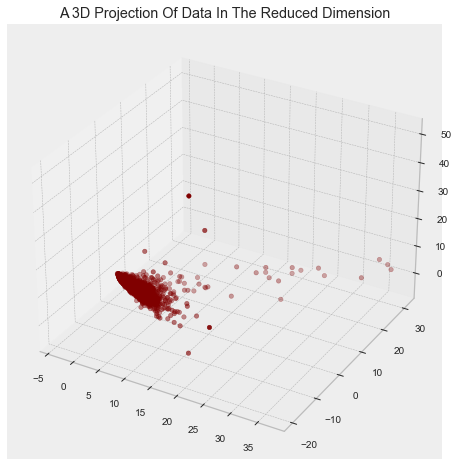

In [159]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
hide_toggle()

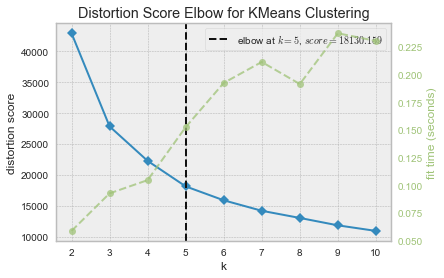

In [160]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()
hide_toggle()


In [161]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC
hide_toggle()

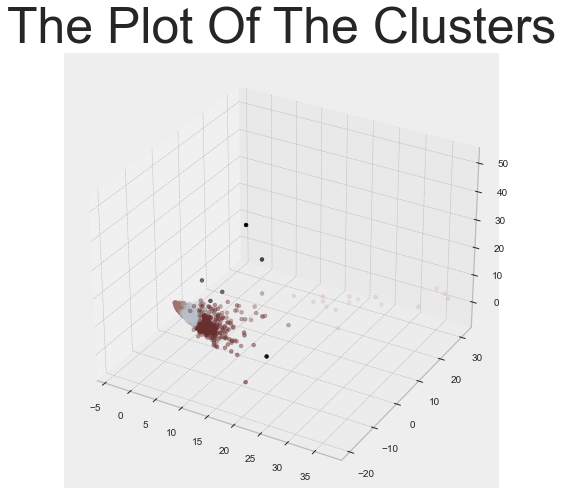

In [162]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#000000"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=15, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters", size=50)

hide_toggle()

In [163]:
df3 = pd.get_dummies(df['Clusters'], prefix="Cluster_")

df=df.join(df3)

df
hide_toggle()

# Supervised learning (Prediction models)

In [164]:
df=df.drop(['night_count', 'morning_count','afternoon_count','evening_count'], axis=1)

In [165]:
df

client_id  target is_ben  Recency  Frequency     Monetary  RFM_Score  \
7      38691781       0      0        5        329   4657294.43       4.90   
8      73534440       0      1        2        326   3640065.55       4.97   
9      19805868       1      0        2        311   8525298.21       4.97   
10     54186907       1      0        4        295  11759925.88       4.92   
11     82235884       0      1        5        242   1880885.75       4.90   
...         ...     ...    ...      ...        ...          ...        ...   
5666   54669253       0      0      103          2    291969.05       0.43   
5667   70444371       1      0        4          2    106972.97       0.99   
5668   71493601       0      0      218          2     50129.52       0.35   
5669    3156819       1      1       32          2      1885.00       0.65   
5670   55906283       0      0      163          2     48049.12       0.38   

      Cluster_RFM_0  Cluster_RFM_1  Cluster_RFM_2  ...  Cluster_types_1  \
7                 1              0              0  ...                1   
8                 0              1              0  ...                2   
9                 0              0              1  ...                2   
10                1              0              0  ...               12   
11                0              1              0  ...               12   
...             ...            ...            ...  ...              ...   
5666              1              0              0  ...                0   
5667              0              1              0  ...                0   
5668              0              1              0  ...                2   
5669              0              0              1  ...                0   
5670              1              0              0  ...                0   

      Cluster_types_2  Cluster_types_3  Cluster_types_4  Clusters  Cluster__0  \
7                   0               14               10         2           0   
8                   0                9                4         2           0   
9                   3                7               13         2           0   
10                  0               14                9         2           0   
11                  1                5                2         2           0   
...               ...              ...              ...       ...         ...   
5666                0                0                2         1           0   
5667                0                1                1         1           0   
5668                0                0                0         1           0   
5669                0                1                0         1           0   
5670                0                2                0         1           0   

      Cluster__1  Cluster__2  Cluster__3  Cluster__4  
7              0           1           0           0  
8              0           1           0           0  
9              0           1           0           0  
10             0           1           0           0  
11             0           1           0           0  
...          ...         ...         ...         ...  
5666           1           0           0           0  
5667           1           0           0           0  
5668           1           0           0           0  
5669           1           0           0           0  
5670           1           0           0           0  

[5464 rows x 37 columns]

In [166]:
df_target=df['target']
df=df.drop(["target","client_id","Clusters"],axis=1)

In [167]:
df.drop(df.iloc[:,29:37], inplace = True, axis = 1)
df

is_ben  Recency  Frequency     Monetary  RFM_Score  Cluster_RFM_0  \
7         0        5        329   4657294.43       4.90              1   
8         1        2        326   3640065.55       4.97              0   
9         0        2        311   8525298.21       4.97              0   
10        0        4        295  11759925.88       4.92              1   
11        1        5        242   1880885.75       4.90              0   
...     ...      ...        ...          ...        ...            ...   
5666      0      103          2    291969.05       0.43              1   
5667      0        4          2    106972.97       0.99              0   
5668      0      218          2     50129.52       0.35              0   
5669      1       32          2      1885.00       0.65              0   
5670      0      163          2     48049.12       0.38              1   

      Cluster_RFM_1  Cluster_RFM_2  Cluster_codes_0  Cluster_codes_1  ...  \
7                 0              0                0                2  ...   
8                 1              0                0                7  ...   
9                 0              1                0                4  ...   
10                0              0                0                4  ...   
11                1              0                0                0  ...   
...             ...            ...              ...              ...  ...   
5666              0              0                0                0  ...   
5667              1              0                0                1  ...   
5668              1              0                0                0  ...   
5669              0              1                0                0  ...   
5670              0              0                0                2  ...   

      Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  \
7                    0                 3                 0             315.0   
8                    0                 0                 1             315.0   
9                    0                 1                 1             302.0   
10                   0                 0                 0             272.0   
11                   0                 1                 3             226.0   
...                ...               ...               ...               ...   
5666                 0                 0                 0               2.0   
5667                 0                 0                 0               1.0   
5668                 0                 0                 0               0.0   
5669                 0                 0                 0               1.0   
5670                 0                 0                 0               0.0   

      Cluster_codes_15  Cluster_types_0  Cluster_types_1  Cluster_types_2  \
7                    0            304.0                1                0   
8                    0            311.0                2                0   
9                    0            286.0                2                3   
10                   0            260.0               12                0   
11                   0            222.0               12                1   
...                ...              ...              ...              ...   
5666                 0              0.0                0                0   
5667                 0              0.0                0                0   
5668                 0              0.0                2                0   
5669                 0              1.0                0                0   
5670                 0              0.0                0                0   

      Cluster_types_3  Cluster_types_4  
7                  14               10  
8                   9                4  
9                   7               13  
10                 14                9  
11                  5                2  
...               ...              ...  
5666              

In [168]:
df

is_ben  Recency  Frequency     Monetary  RFM_Score  Cluster_RFM_0  \
7         0        5        329   4657294.43       4.90              1   
8         1        2        326   3640065.55       4.97              0   
9         0        2        311   8525298.21       4.97              0   
10        0        4        295  11759925.88       4.92              1   
11        1        5        242   1880885.75       4.90              0   
...     ...      ...        ...          ...        ...            ...   
5666      0      103          2    291969.05       0.43              1   
5667      0        4          2    106972.97       0.99              0   
5668      0      218          2     50129.52       0.35              0   
5669      1       32          2      1885.00       0.65              0   
5670      0      163          2     48049.12       0.38              1   

      Cluster_RFM_1  Cluster_RFM_2  Cluster_codes_0  Cluster_codes_1  ...  \
7                 0              0                0                2  ...   
8                 1              0                0                7  ...   
9                 0              1                0                4  ...   
10                0              0                0                4  ...   
11                1              0                0                0  ...   
...             ...            ...              ...              ...  ...   
5666              0              0                0                0  ...   
5667              1              0                0                1  ...   
5668              1              0                0                0  ...   
5669              0              1                0                0  ...   
5670              0              0                0                2  ...   

      Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  \
7                    0                 3                 0             315.0   
8                    0                 0                 1             315.0   
9                    0                 1                 1             302.0   
10                   0                 0                 0             272.0   
11                   0                 1                 3             226.0   
...                ...               ...               ...               ...   
5666                 0                 0                 0               2.0   
5667                 0                 0                 0               1.0   
5668                 0                 0                 0               0.0   
5669                 0                 0                 0               1.0   
5670                 0                 0                 0               0.0   

      Cluster_codes_15  Cluster_types_0  Cluster_types_1  Cluster_types_2  \
7                    0            304.0                1                0   
8                    0            311.0                2                0   
9                    0            286.0                2                3   
10                   0            260.0               12                0   
11                   0            222.0               12                1   
...                ...              ...              ...              ...   
5666                 0              0.0                0                0   
5667                 0              0.0                0                0   
5668                 0              0.0                2                0   
5669                 0              1.0                0                0   
5670                 0              0.0                0                0   

      Cluster_types_3  Cluster_types_4  
7                  14               10  
8                   9                4  
9                   7               13  
10                 14                9  
11                  5                2  
...               ...              ...  
5666              

In [169]:
#Split dataset to train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(df, df_target, random_state=0, test_size=0.25)

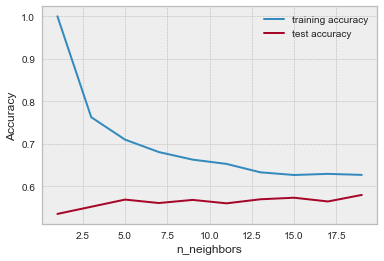

In [170]:

training_accuracy = [] 
test_accuracy = []

neighbors_settings = range(1, 20,2)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
 
    training_accuracy.append(clf.score(X_train, y_train)) 

    test_accuracy.append(clf.score(X_test, y_test))
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [171]:
round(clf.score(X_test, y_test),2)

0.58

In [172]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(round(tree.score(X_test, y_test),2)))

Accuracy on training set: 1.000
Accuracy on test set: 0.540


[Text(289.799438230312, 214.5016216216216, 'Cluster_codes_6 <= 0.5\ngini = 0.495\nsamples = 4098\nvalue = [2250, 1848]'),
 Text(260.11553387950306, 208.62486486486486, 'Monetary <= 1003614.625\ngini = 0.487\nsamples = 3603\nvalue = [2092, 1511]'),
 Text(232.19028273586136, 202.7481081081081, 'Cluster_codes_4 <= 0.5\ngini = 0.477\nsamples = 3077\nvalue = [1871, 1206]'),
 Text(217.34501672321437, 196.87135135135134, 'Cluster_codes_9 <= 0.5\ngini = 0.485\nsamples = 2731\nvalue = [1601, 1130]'),
 Text(203.0124949287604, 190.9945945945946, 'Cluster_codes_11 <= 0.5\ngini = 0.482\nsamples = 2615\nvalue = [1559, 1056]'),
 Text(183.67155614135433, 185.11783783783784, 'Cluster_codes_0 <= 1.5\ngini = 0.478\nsamples = 2488\nvalue = [1507, 981]'),
 Text(155.4267041740459, 179.24108108108106, 'Monetary <= 527684.094\ngini = 0.475\nsamples = 2446\nvalue = [1494, 952]'),
 Text(117.56251881228006, 173.36432432432431, 'Cluster_types_0 <= 0.5\ngini = 0.469\nsamples = 2132\nvalue = [1331, 801]'),
 Text(63

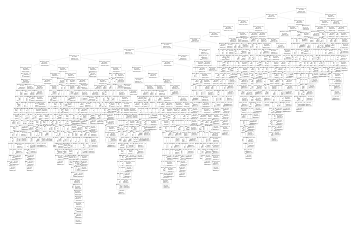

In [173]:
from sklearn.tree import plot_tree 
%matplotlib inline

plot_tree(tree, feature_names = X_train.columns)

In [174]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["male", "female"],
                feature_names=X_train.columns,
                filled=True)

In [175]:
import graphviz
with open("tree.dot") as f: dot_graph = f.read()
graphviz.Source(dot_graph)

In [176]:
tree = DecisionTreeClassifier(max_depth=29, random_state=0) 
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.538


In [177]:
"""
With graphviz you can look in detail the tree
"""
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["male", "female"],
                feature_names = X_train.columns,
                filled=True)

In [178]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.00572598 0.14993002 0.03633243 0.17441531 0.09937383 0.01069217
 0.01044929 0.01675366 0.0158783  0.04133236 0.007482   0.03571799
 0.01617676 0.00396958 0.03149749 0.04327088 0.00645794 0.00979343
 0.00993469 0.00721823 0.01428465 0.01920603 0.04761312 0.00510242
 0.03967961 0.04261266 0.00257067 0.05121655 0.04531196]


In [179]:
df

is_ben  Recency  Frequency     Monetary  RFM_Score  Cluster_RFM_0  \
7         0        5        329   4657294.43       4.90              1   
8         1        2        326   3640065.55       4.97              0   
9         0        2        311   8525298.21       4.97              0   
10        0        4        295  11759925.88       4.92              1   
11        1        5        242   1880885.75       4.90              0   
...     ...      ...        ...          ...        ...            ...   
5666      0      103          2    291969.05       0.43              1   
5667      0        4          2    106972.97       0.99              0   
5668      0      218          2     50129.52       0.35              0   
5669      1       32          2      1885.00       0.65              0   
5670      0      163          2     48049.12       0.38              1   

      Cluster_RFM_1  Cluster_RFM_2  Cluster_codes_0  Cluster_codes_1  ...  \
7                 0              0                0                2  ...   
8                 1              0                0                7  ...   
9                 0              1                0                4  ...   
10                0              0                0                4  ...   
11                1              0                0                0  ...   
...             ...            ...              ...              ...  ...   
5666              0              0                0                0  ...   
5667              1              0                0                1  ...   
5668              1              0                0                0  ...   
5669              0              1                0                0  ...   
5670              0              0                0                2  ...   

      Cluster_codes_11  Cluster_codes_12  Cluster_codes_13  Cluster_codes_14  \
7                    0                 3                 0             315.0   
8                    0                 0                 1             315.0   
9                    0                 1                 1             302.0   
10                   0                 0                 0             272.0   
11                   0                 1                 3             226.0   
...                ...               ...               ...               ...   
5666                 0                 0                 0               2.0   
5667                 0                 0                 0               1.0   
5668                 0                 0                 0               0.0   
5669                 0                 0                 0               1.0   
5670                 0                 0                 0               0.0   

      Cluster_codes_15  Cluster_types_0  Cluster_types_1  Cluster_types_2  \
7                    0            304.0                1                0   
8                    0            311.0                2                0   
9                    0            286.0                2                3   
10                   0            260.0               12                0   
11                   0            222.0               12                1   
...                ...              ...              ...              ...   
5666                 0              0.0                0                0   
5667                 0              0.0                0                0   
5668                 0              0.0                2                0   
5669                 0              1.0                0                0   
5670                 0              0.0                0                0   

      Cluster_types_3  Cluster_types_4  
7                  14               10  
8                   9                4  
9                   7               13  
10                 14                9  
11                  5                2  
...               ...              ...  
5666              

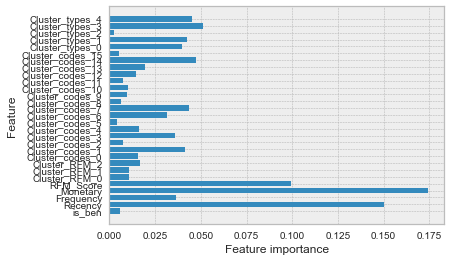

In [180]:
"""
We can visualize the feature importances 
"""
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = df.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

plot_feature_importances_cancer(tree)

In [181]:
forest = RandomForestClassifier() 
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.644


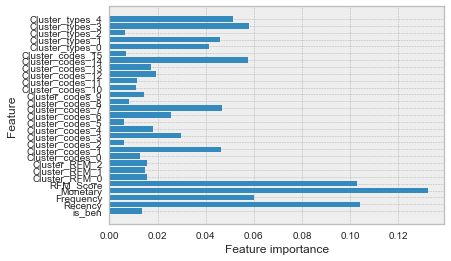

In [182]:
def plot_feature_importances_df(model):
    n_features = df.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_df(forest)

In [183]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [184]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=forest,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [185]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   28.0s finished


Wall time: 28.7 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [186]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=200)

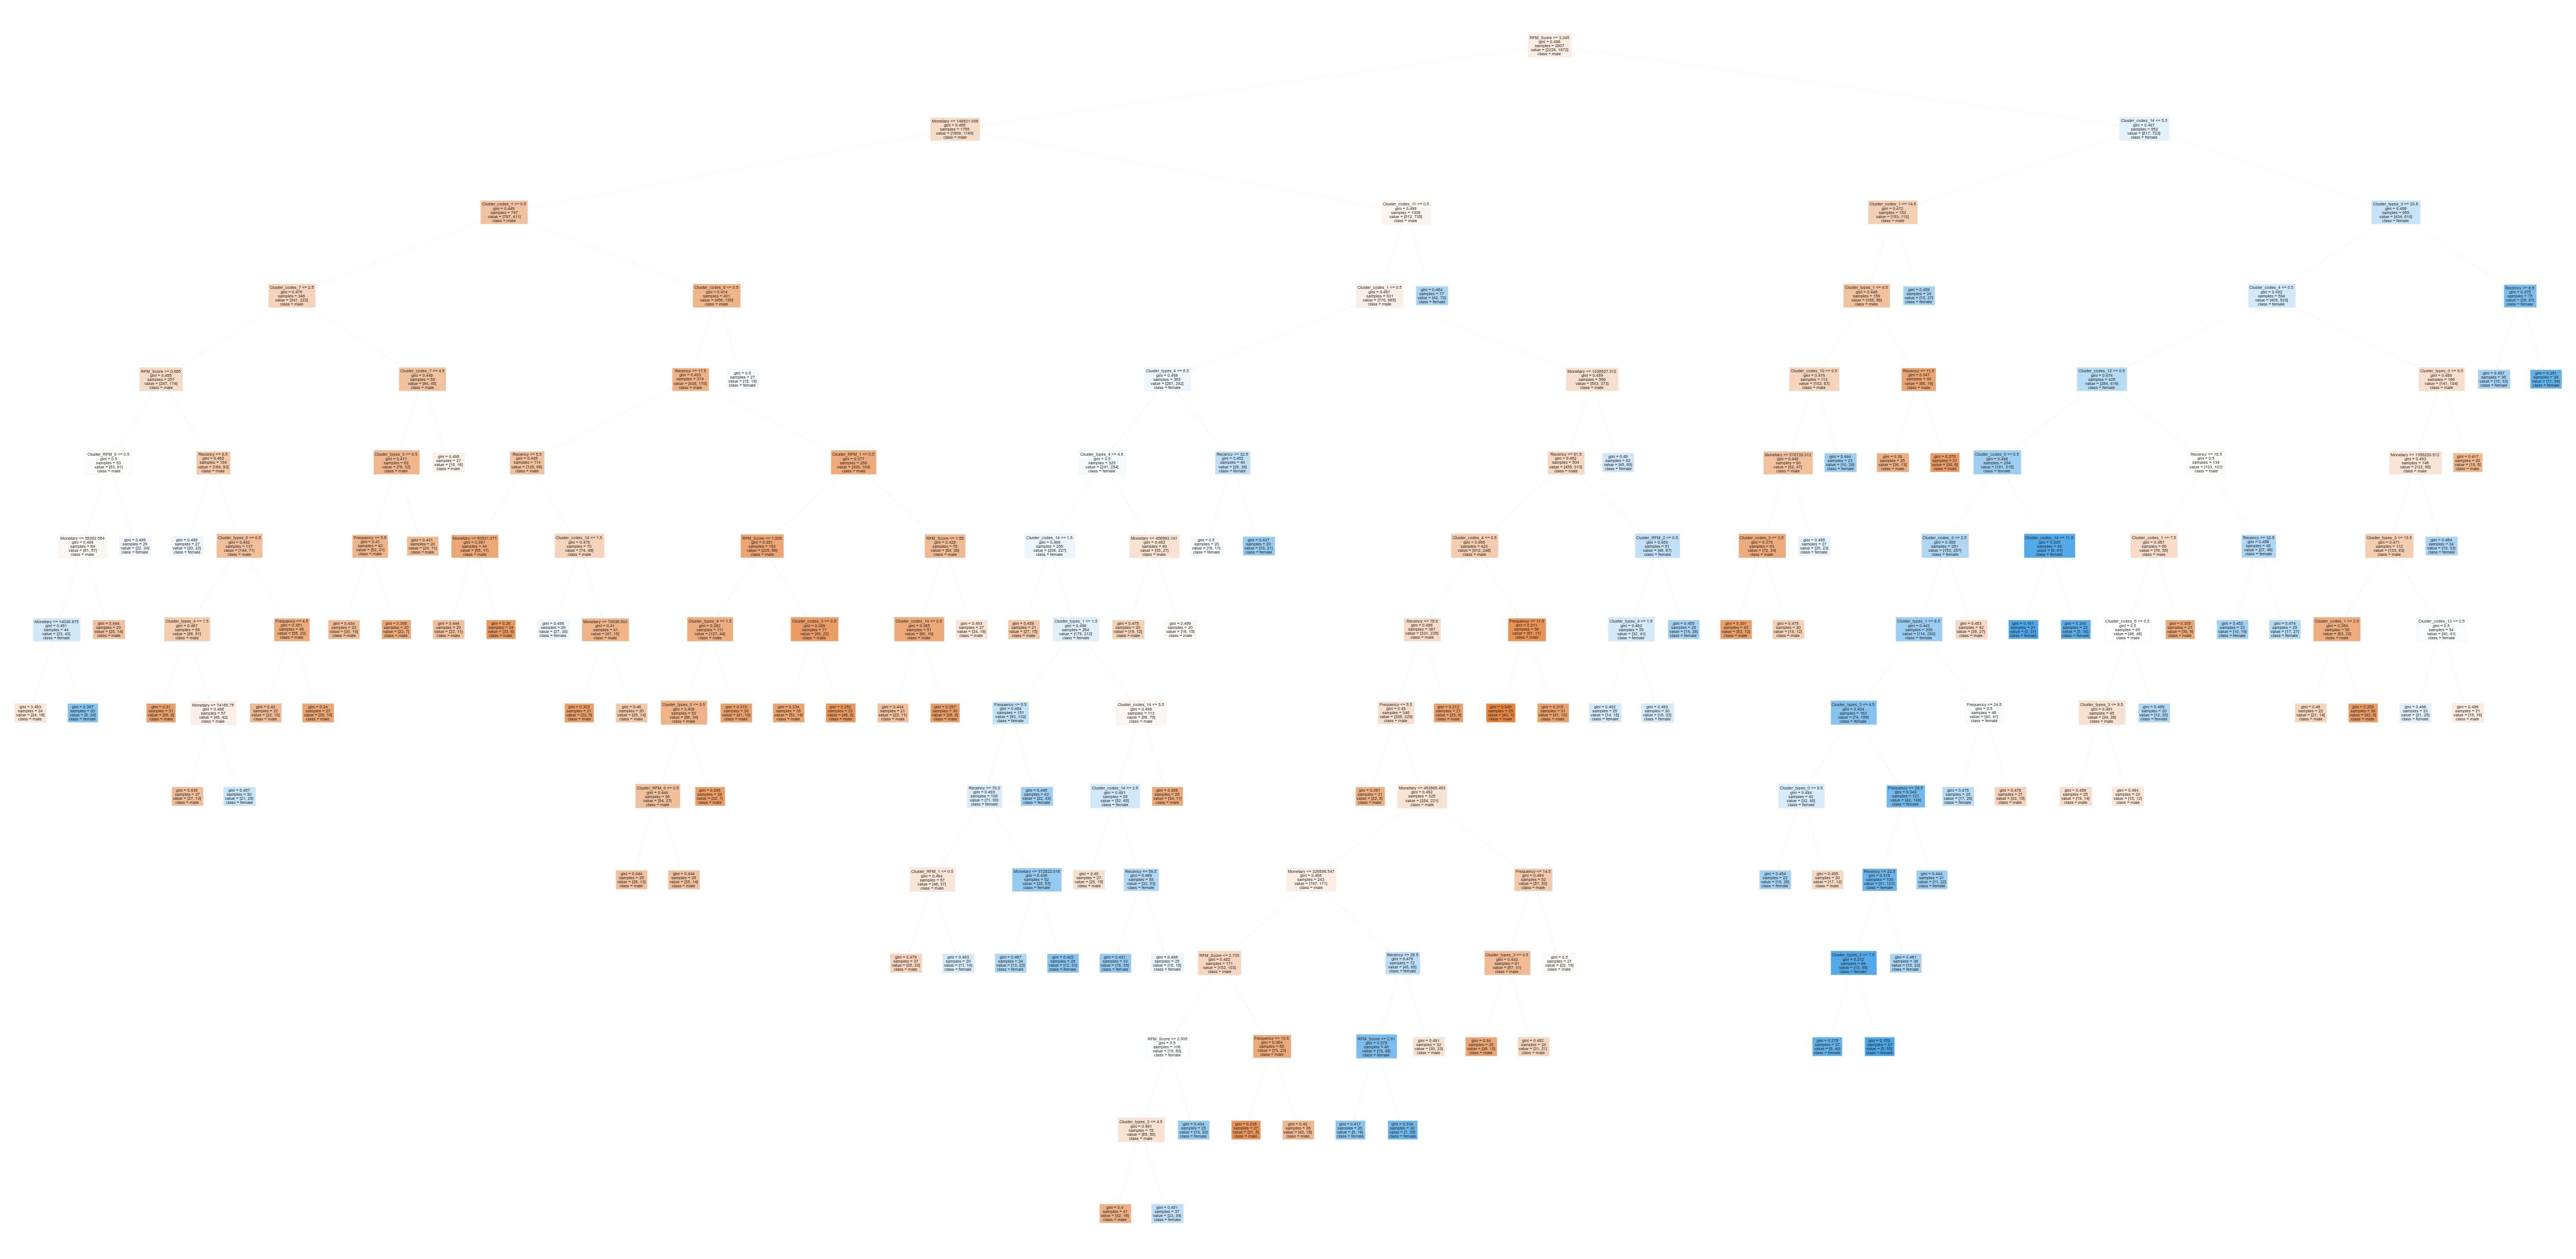

In [187]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))

plot_tree(rf_best.estimators_[5], 
          feature_names = df.columns, 
          class_names=['male','female']
          ,filled=True);

In [188]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=200)

In [189]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.705
Accuracy on test set: 0.643


In [190]:
#best accuracy on random forest with default hyper parameters
#we build confusion matrix

In [191]:
y_true = y_test
y_predicted = forest.predict(X_test)
confusion_matrix(y_true, y_predicted)

array([[574, 224],
       [262, 306]], dtype=int64)

In [192]:
from sklearn.metrics import classification_report

In [193]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       798
           1       0.58      0.54      0.56       568

    accuracy                           0.64      1366
   macro avg       0.63      0.63      0.63      1366
weighted avg       0.64      0.64      0.64      1366



In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [195]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.42


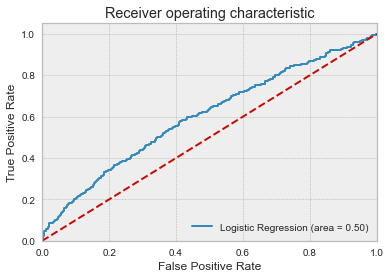

In [196]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [197]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, y_predicted)

In [198]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [199]:
pred = logreg.predict(X_test)

In [200]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [201]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       798
           1       0.42      1.00      0.59       568

    accuracy                           0.42      1366
   macro avg       0.21      0.50      0.29      1366
weighted avg       0.17      0.42      0.24      1366



In [202]:
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.4158125915080527
Recall:  1.0


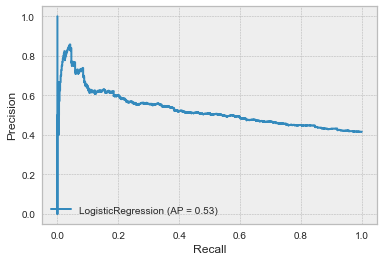

In [203]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(logreg, X_test, y_test)